# Project 3: Project #GetWellPlan
---

**Organization of Project Notebooks:**
- Notebook #1: [Problem Statement & Webscrapping](./01_problem_statement_and_webscrapping.ipynb)
- **Notebook #2: Data Cleaning & Exploratory Data Analysis** (current notebook)
- Notebook #3: [Preprocessing & Modelling](./03_preprocessing_and_modelling.ipynb)
- Notebook #4: [Sentiment Analysis & Recommendations](./04_sentiment_analysis_and_recommendations.ipynb)

## Notebook #2: Data Cleaning & Exploratory Data Analysis

### Contents
- [1. Introduction](#1.-Introduction)
- [2. Exploratory Data Analysis for Walmart and Costco subreddits](#2.-Exploratory-Data-Analysis-for-Walmart-and-Costco-subreddits)
- [3. Identifying the most common words in Walmart and Costco subreddits](#3.-Identifying-the-most-common-words-in-Walmart-and-Costco-subreddits)
- [4. Data Cleaning & Feature Engineering](#4.-Data-Cleaning-&-Feature-Engineering)
- [5. Visualizing relationships between Walmart and Costco subreddits](#5.-Visualizing-relationships-between-Walmart-and-Costco-subreddits)
- [6. Merging both Walmart and Costco datasets](#6.-Merging-both-Walmart-and-Costco-datasets)

### 1. Introduction

In this notebook, the data obtained from webscrapping both Walmart and Costco subreddits will be examined, which includes identifying the words that appear most commonly in the post titles. In addition, new features will be engineered to understand any relationships between Walmart and Costco. The data will also be cleaned to aid in the building of a more accurate classification model. 

For the purpose of the analysis, the original files pulled from Walmart and Costco subreddits (during the first extraction) have been duplicated, to reduce any disparity between the posts pulled and findings obtained. The following files will be referenced to in this notebook: 
- [walmart_posts_actual.csv](./datasets/walmart_posts_actual.csv)
- [costco_posts_actual.csv](./datasets/costco_posts_actual.csv)

In [1]:
# import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
# import both Walmart and Costco datasets
walmart_df = pd.read_csv('datasets/walmart_posts_actual.csv')
costco_df = pd.read_csv('datasets/costco_posts_actual.csv')

### 2. Exploratory Data Analysis for Walmart and Costco subreddits

For this section, we will be exploring the datasets in Walmart and Costco subreddits respectively, such as checking for null values, duplicated values, and converting the relevant fields to human-readable format.

#### Exploring the Walmart subreddit

In [3]:
# view the first 5 posts in the DataFrame
walmart_df.head()

,Unnamed: 0,author,created_utc,id,num_comments,score,selftext,subreddit,title,url
0,0,armoreddillo,1.605935e+09,jy56so,434,4912,👆,walmart,"If you're here, as a customer, to complain abo...",https://www.reddit.com/r/walmart/comments/jy56...
1,1,jasiad,1.623168e+09,nv7aao,28,18,"Disclaimer: Don't be disrespectful, don't be r...",walmart,Weekly Salt Thread 207 - The Nintendo Switch N...,https://www.reddit.com/r/walmart/comments/nv7a...
2,2,MadHatler,1.623278e+09,nw89f8,47,481,NaN,walmart,How do y’all pay bills,https://i.redd.it/s12ll09dhb471.jpg
3,3,KVirello,1.623279e+09,nw8n27,28,183,My entire adult life I have never worked Sunda...,walmart,Just promoted myself to customer halfway throu...,https://www.reddit.com/r/walmart/comments/nw8n...
4,4,-_Trashboat,1.623256e+09,nvzzf2,48,454,NaN,walmart,DC Tips & Tricks #37: Make Sure Your Pallet Ha...,https://i.imgur.com/Lu5oNZ5.jpg


In [4]:
# drop the first unnamed column
walmart_df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# view data type 
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   author        926 non-null    object 
 1   created_utc   926 non-null    float64
 2   id            926 non-null    object 
 3   num_comments  926 non-null    int64  
 4   score         926 non-null    int64  
 5   selftext      544 non-null    object 
 6   subreddit     926 non-null    object 
 7   title         926 non-null    object 
 8   url           926 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 65.2+ KB


- Most columns seem to have appropriate data types, except for the 'created_utc' column.
    - The 'created_utc' column is currently listed in its scientific notation (Unix epoch time format), which measures the number of seconds that have passed since 1 January 1970 00:00:00 UT (also known as the Unix epoch). 
    - We will convert it to the human readable date and time for EDA subsequently.

In [6]:
# convert 'created_utc' column to human readable date and time
walmart_df['created_utc'] = walmart_df['created_utc'].map(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))

In [7]:
# view the revised 'created_utc' column
walmart_df[['created_utc']]

,created_utc
0,2020-11-21 13:11:36
1,2021-06-08 23:53:14
2,2021-06-10 06:33:11
3,2021-06-10 06:51:44
4,2021-06-10 00:28:46
...,...
921,2021-06-02 14:18:37
922,2021-06-03 02:58:24
923,2021-06-03 08:36:32
924,2021-06-02 22:39:27


In [8]:
# check for null values 
walmart_df.isnull().sum()

author            0
created_utc       0
id                0
num_comments      0
score             0
selftext        382
subreddit         0
title             0
url               0
dtype: int64

- Most columns do not have any null values, except for the 'selftext' column. 
- It is likely that users have created posts with just the 'title' alone, or by sharing images and videos and therefore leaving the 'selftext' column blank. 
- We will leave the null values in the 'selftext' column intact first.

In [9]:
# check for duplicated rows based on 'id'
len(walmart_df['id'].unique())

926

#### Exploring the Costco subreddit

In [10]:
# view the first 5 posts in the DataFrame
costco_df.head()

,Unnamed: 0,author,created_utc,id,num_comments,score,selftext,subreddit,title,url
0,0,dyzlexiK,1.616428e+09,maqvfw,269,1337,"Hey All,\n\nRecently we caught and banned a us...",Costco,Always use your best judgement before buying a...,https://www.reddit.com/r/Costco/comments/maqvf...
1,1,MistahNative,1.623090e+09,nujg54,24,174,"Hello Everyone! \n\nFor awhile now, the Mod Te...",Costco,Please Welcome Our New Moderator!,https://www.reddit.com/r/Costco/comments/nujg5...
2,2,TheOpus,1.623259e+09,nw0ztk,54,722,NaN,Costco,"""Costco seems like a nice place."" Daughter twe...",https://twitter.com/mixbecca/status/1390431187...
3,3,smacklyn,1.623271e+09,nw5sc6,13,325,NaN,Costco,loving this dog bed! she was out cold minutes ...,https://www.reddit.com/gallery/nw5sc6
4,4,Hot_Humor_5246,1.623297e+09,nwebmy,35,73,Look i get that they pay for it and that fresh...,Costco,Watching members pick out chickens,https://www.reddit.com/r/Costco/comments/nwebm...


In [11]:
# drop the first unnamed column
costco_df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
# view data type 
costco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   author        970 non-null    object 
 1   created_utc   973 non-null    float64
 2   id            973 non-null    object 
 3   num_comments  973 non-null    int64  
 4   score         973 non-null    int64  
 5   selftext      522 non-null    object 
 6   subreddit     973 non-null    object 
 7   title         973 non-null    object 
 8   url           973 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 68.5+ KB


- Similar to the Walmart data, most columns seem to have appropriate data types, except for the 'created_utc' column.
    - We will need to convert the 'created_utc' column to the human readable date and time for EDA subsequently.

In [13]:
# convert 'created_utc' column to human readable date and time
costco_df['created_utc'] = costco_df['created_utc'].map(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))

In [14]:
# view the revised 'created_utc' column
costco_df[['created_utc']]

,created_utc
0,2021-03-22 23:54:40
1,2021-06-08 02:18:39
2,2021-06-10 01:12:28
3,2021-06-10 04:41:15
4,2021-06-10 11:50:28
...,...
968,2021-05-10 04:20:15
969,2021-05-11 10:05:15
970,2021-05-11 05:21:37
971,2021-05-11 08:18:12


In [15]:
# check for null values 
costco_df.isnull().sum()

author            3
created_utc       0
id                0
num_comments      0
score             0
selftext        451
subreddit         0
title             0
url               0
dtype: int64

In [16]:
# view the null values in the 'author' column
costco_df.loc[costco_df['author'].isnull(),:]

,author,created_utc,id,num_comments,score,selftext,subreddit,title,url
366,NaN,2021-05-31 05:01:07,nokhiz,13,0,Just back from Costco Las Vegas.. There were ...,Costco,Costco hot dog update:,https://www.reddit.com/r/Costco/comments/nokhi...
398,NaN,2021-05-29 21:31:28,nnnjnv,11,0,Does your Costco sell natural casing hot dogs?...,Costco,Natural casing hot dogs,https://www.reddit.com/r/Costco/comments/nnnjn...
951,NaN,2021-05-11 09:03:03,n9l3md,4,13,"Is back in action, bought 1 tonight for $14.99...",Costco,Junior’s NY Cheesecake,https://www.reddit.com/r/Costco/comments/n9l3m...


- Similar to the Walmart data, most columns do not have any null values, except for the 'author' and 'selftext' column.
- For the null 'author' values, it is likely that users might have deleted their accounts on Reddit.
    - However, as their posts remain relevant, we will keep the null values in the 'author' column intact.  
- Additionally, it is also likely that users created posts with just the 'title' alone, or by sharing images and videos and therefore leaving the 'selftext' column blank.
    - We will also leave the null values in the 'selftext' column intact first.

In [17]:
# check for duplicated rows based on 'id'
len(costco_df['id'].unique())

973

### 3. Identifying the most common words in Walmart and Costco subreddits

In this section, we will be looking into the contents under the columns 'title' and 'selftext', to understand what users are posting on the respective subreddits. 

A simple count vectorizer (with sklearn's default function such as english stop words) will be used to fit and transform the text, and to extract one-word and two-word phrases.

#### Most common one-word under 'title'

In [18]:
# instantiate CountVectorizer (one-word, with stop words removed)
cvec = CountVectorizer(stop_words='english')

# Walmart - fit/transform the CountVectorizer to the title and obtain the top 50 words with the highest count
walmart_cvec = cvec.fit_transform(walmart_df['title'])
walmart_cvec = pd.DataFrame(walmart_cvec.toarray(), 
                            columns = cvec.get_feature_names())
walmart_title_50 = walmart_cvec.sum().sort_values(ascending=False).head(50)

# Costco - fit/transform the CountVectorizer to the title and obtain the top 50 words with the highest count
costco_cvec = cvec.fit_transform(costco_df['title'])
costco_cvec = pd.DataFrame(costco_cvec.toarray(), 
                           columns = cvec.get_feature_names())
costco_title_50 = costco_cvec.sum().sort_values(ascending=False).head(50)

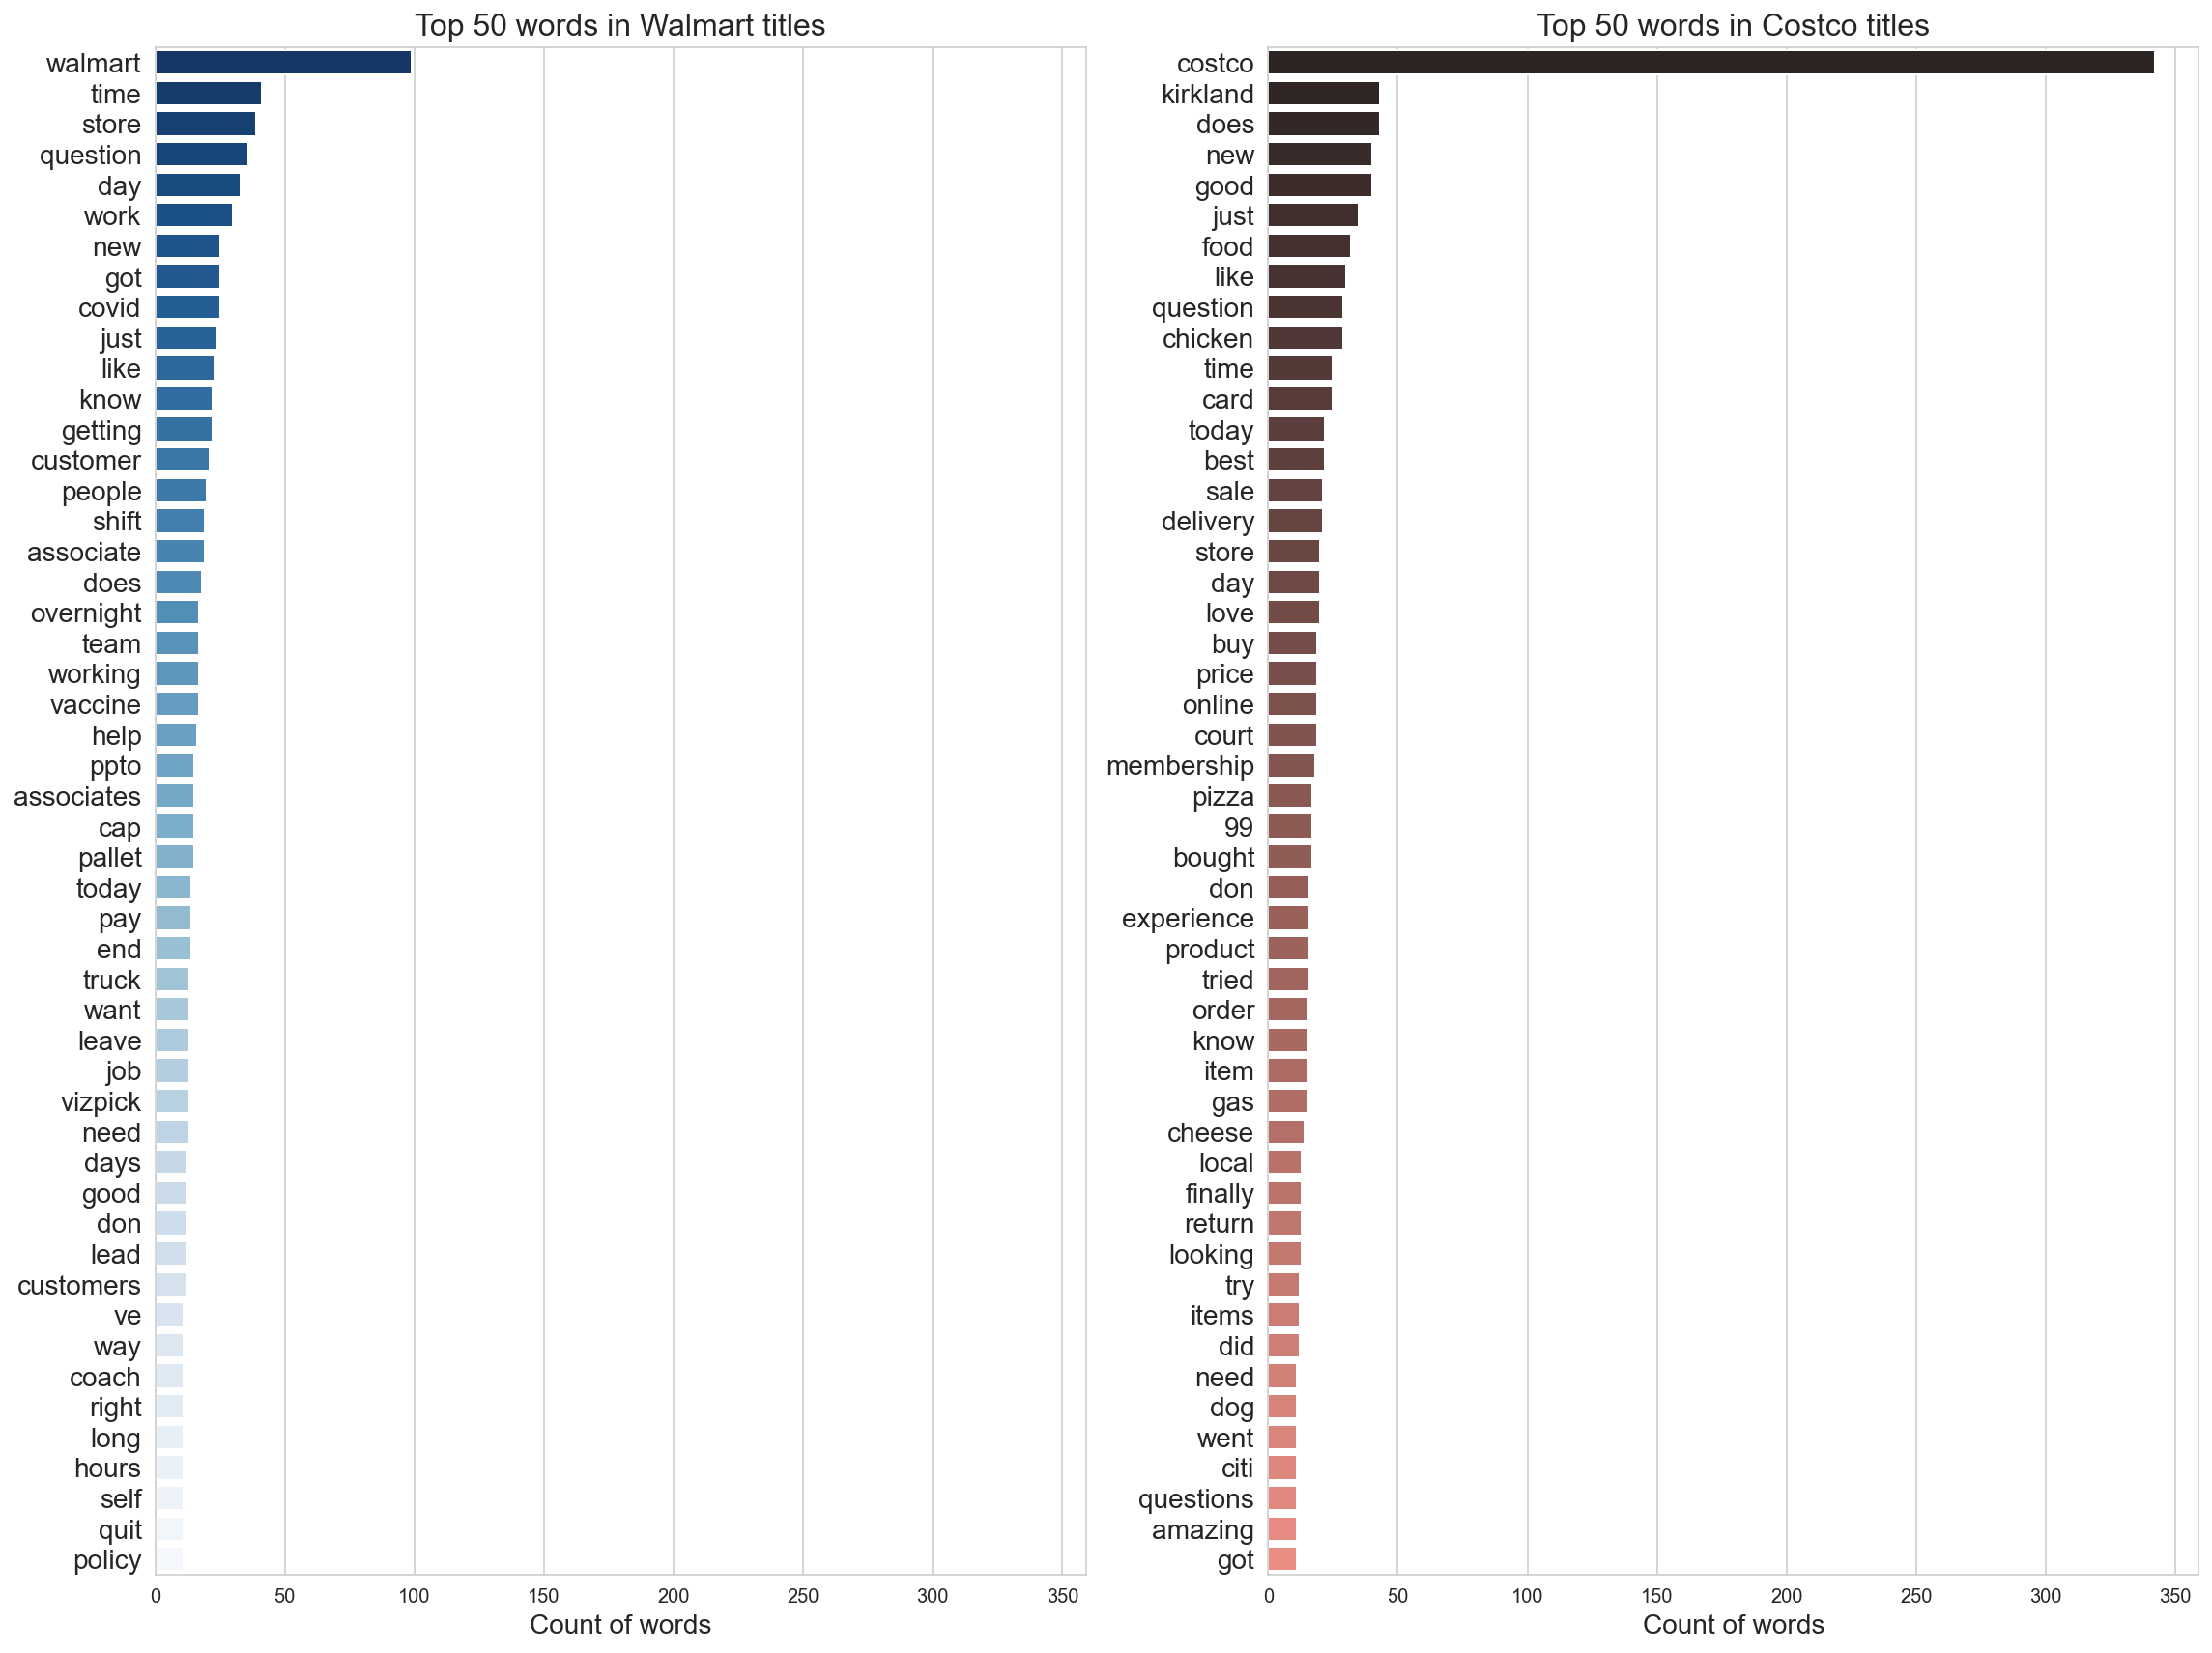

In [19]:
# plot results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,12), sharex=True)

# plot results for Walmart
sns.barplot(y=walmart_title_50.index.values, x=walmart_title_50, palette='Blues_r', ax=ax[0])
ax[0].set_title('Top 50 words in Walmart titles',fontsize=16)
ax[0].set_xlabel('Count of words', fontsize=14)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

# plot results for Costco
sns.barplot(y=costco_title_50.index.values, x=costco_title_50, palette='dark:salmon', ax=ax[1])
ax[1].set_title('Top 50 words in Costco titles',fontsize=16)
ax[1].set_xlabel('Count of words', fontsize=14)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()

- With the default stop words being removed, we observe that the top words that commonly appear in the respective subreddits include: 
    - Walmart: 'walmart', 'time', 'store', 'question', 'day', 'work', 'new', 'covid'
    - Costco: 'costco', 'kirkland', 'new', 'good', 'food', 'chicken', 'time'
    
- Words that allow for easy recognition of the brands, such as 'walmart', 'costco' and 'kirkland', will need to be added to the list of stop words, so as to enhance the model's classification ability. 
- Other words that appear commonly in both subreddits such as 'just', 'like' and 'got' will also need to be added to the list of stop words, as they do not aid in the classification of whether a post belongs to Walmart or Costco. 

#### Most common two-word phrases under 'title'

In [20]:
# instantiate CountVectorizer (two-word phrases, with stop words removed)
cvec = CountVectorizer(ngram_range=(2,2), stop_words='english')

# Walmart - fit/transform the CountVectorizer to the title and obtain the top 50 two-word phrases with the highest count
walmart_cvec = cvec.fit_transform(walmart_df['title'])
walmart_cvec = pd.DataFrame(walmart_cvec.toarray(), 
                            columns = cvec.get_feature_names())
walmart_title_50 = walmart_cvec.sum().sort_values(ascending=False).head(50)

# Costco - fit/transform the CountVectorizer to the title and obtain the top 50 two-word phrases with the highest count
costco_cvec = cvec.fit_transform(costco_df['title'])
costco_cvec = pd.DataFrame(costco_cvec.toarray(), 
                           columns = cvec.get_feature_names())
costco_title_50 = costco_cvec.sum().sort_values(ascending=False).head(50)

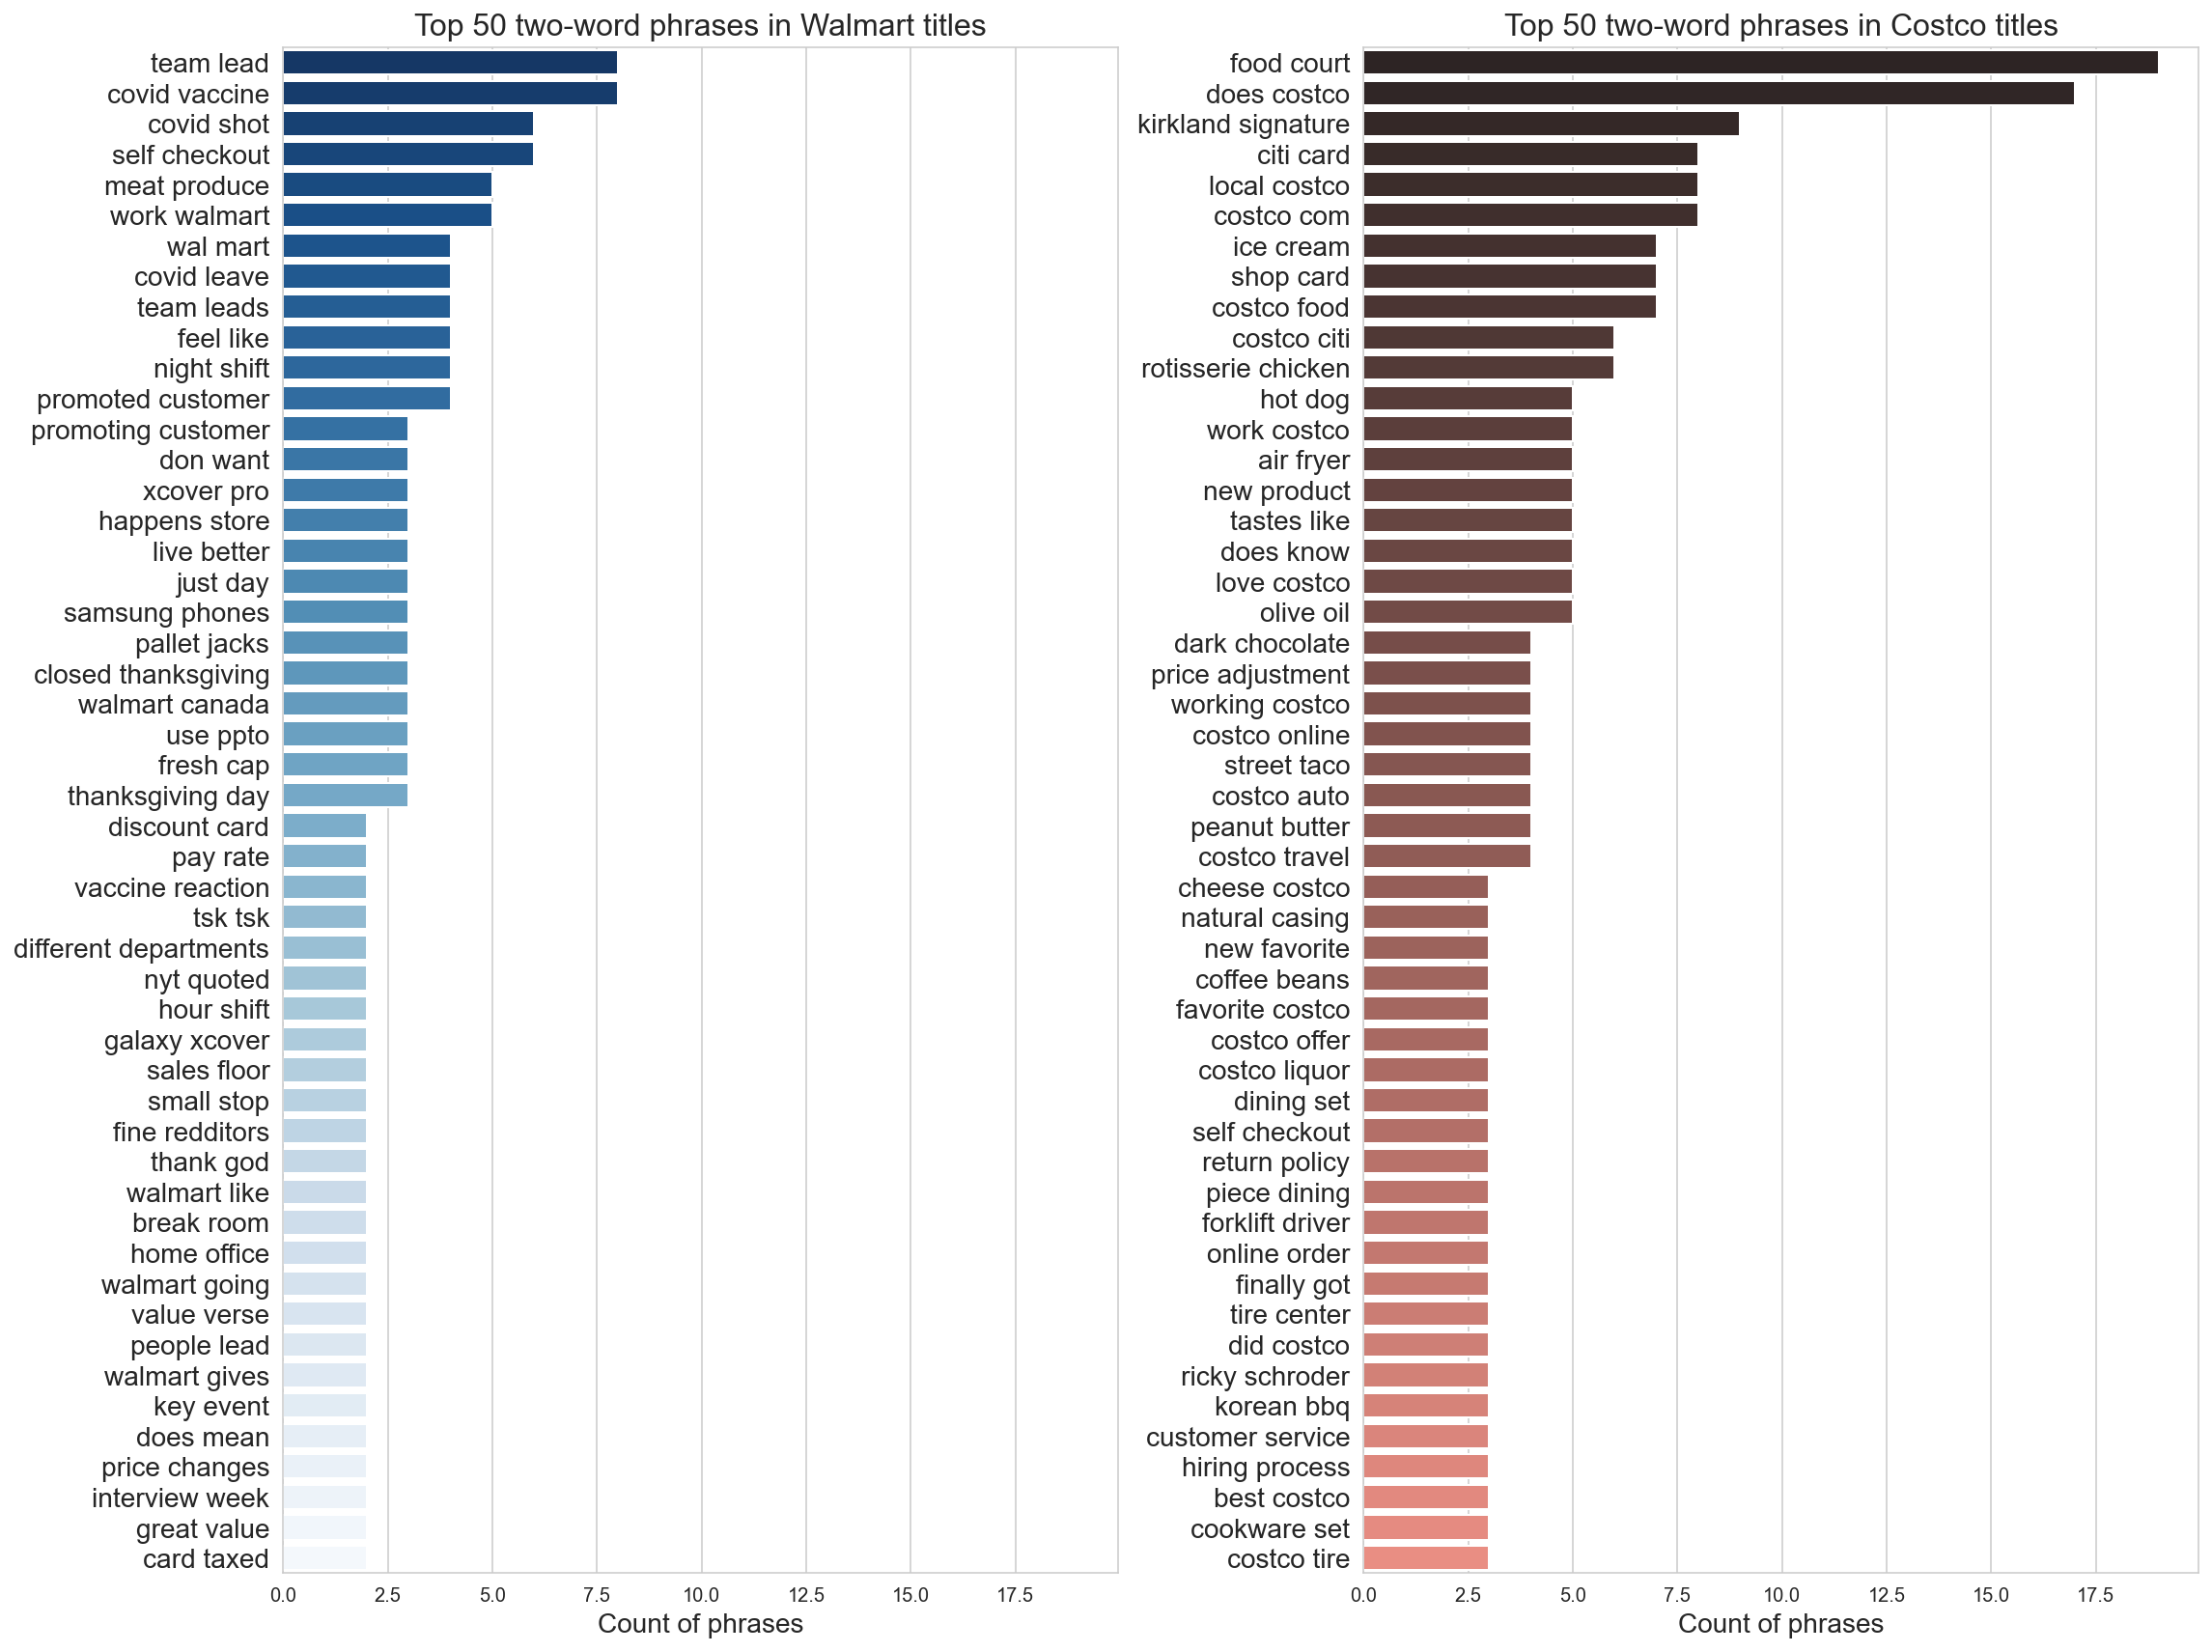

In [21]:
# plot results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,12), sharex=True)

# plot results for Walmart
sns.barplot(y=walmart_title_50.index.values, x=walmart_title_50, palette='Blues_r', ax=ax[0])
ax[0].set_title('Top 50 two-word phrases in Walmart titles',fontsize=16)
ax[0].set_xlabel('Count of phrases', fontsize=14)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

# plot results for Costco
sns.barplot(y=costco_title_50.index.values, x=costco_title_50, palette='dark:salmon', ax=ax[1])
ax[1].set_title('Top 50 two-word phrases in Costco titles',fontsize=16)
ax[1].set_xlabel('Count of phrases', fontsize=14)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()

- From the list of two-word phrases, it becomes apparent that:
    - The Walmart subreddit contains a combination of posts from customers and employees, where users may post queries about their work, i.e. regarding their 'team lead', 'covid leave', 'night shift'. 
    - On the other hand, the Costco subreddit contains mainly posts from customers, with contents surrounding 'citi card', 'ice cream', 'costco food'. 
- As we dive deeper subsequently, the Walmart subreddit may shed some light about the employee experience, particularly from associates working at the Walmart supermarkets. 

#### Most common one-word under 'selftext'

In [22]:
# fill up the blank values in selftext column
walmart_df['selftext'].fillna(value='nothinghere', inplace=True)
costco_df['selftext'].fillna(value='nothinghere', inplace=True)

In [23]:
# instantiate CountVectorizer (one-word, with stop words removed)
cvec = CountVectorizer(stop_words='english')

# Walmart - fit/transform the CountVectorizer to the selftext and obtain the top 50 words with the highest count
walmart_cvec = cvec.fit_transform(walmart_df['selftext'])
walmart_cvec = pd.DataFrame(walmart_cvec.toarray(), 
                            columns = cvec.get_feature_names())
walmart_post_50 = walmart_cvec.sum().sort_values(ascending=False).head(50)

# Costco - fit/transform the CountVectorizer to the selftext and obtain the top 50 words with the highest count
costco_cvec = cvec.fit_transform(costco_df['selftext'])
costco_cvec = pd.DataFrame(costco_cvec.toarray(), 
                           columns = cvec.get_feature_names())
costco_post_50 = costco_cvec.sum().sort_values(ascending=False).head(50)

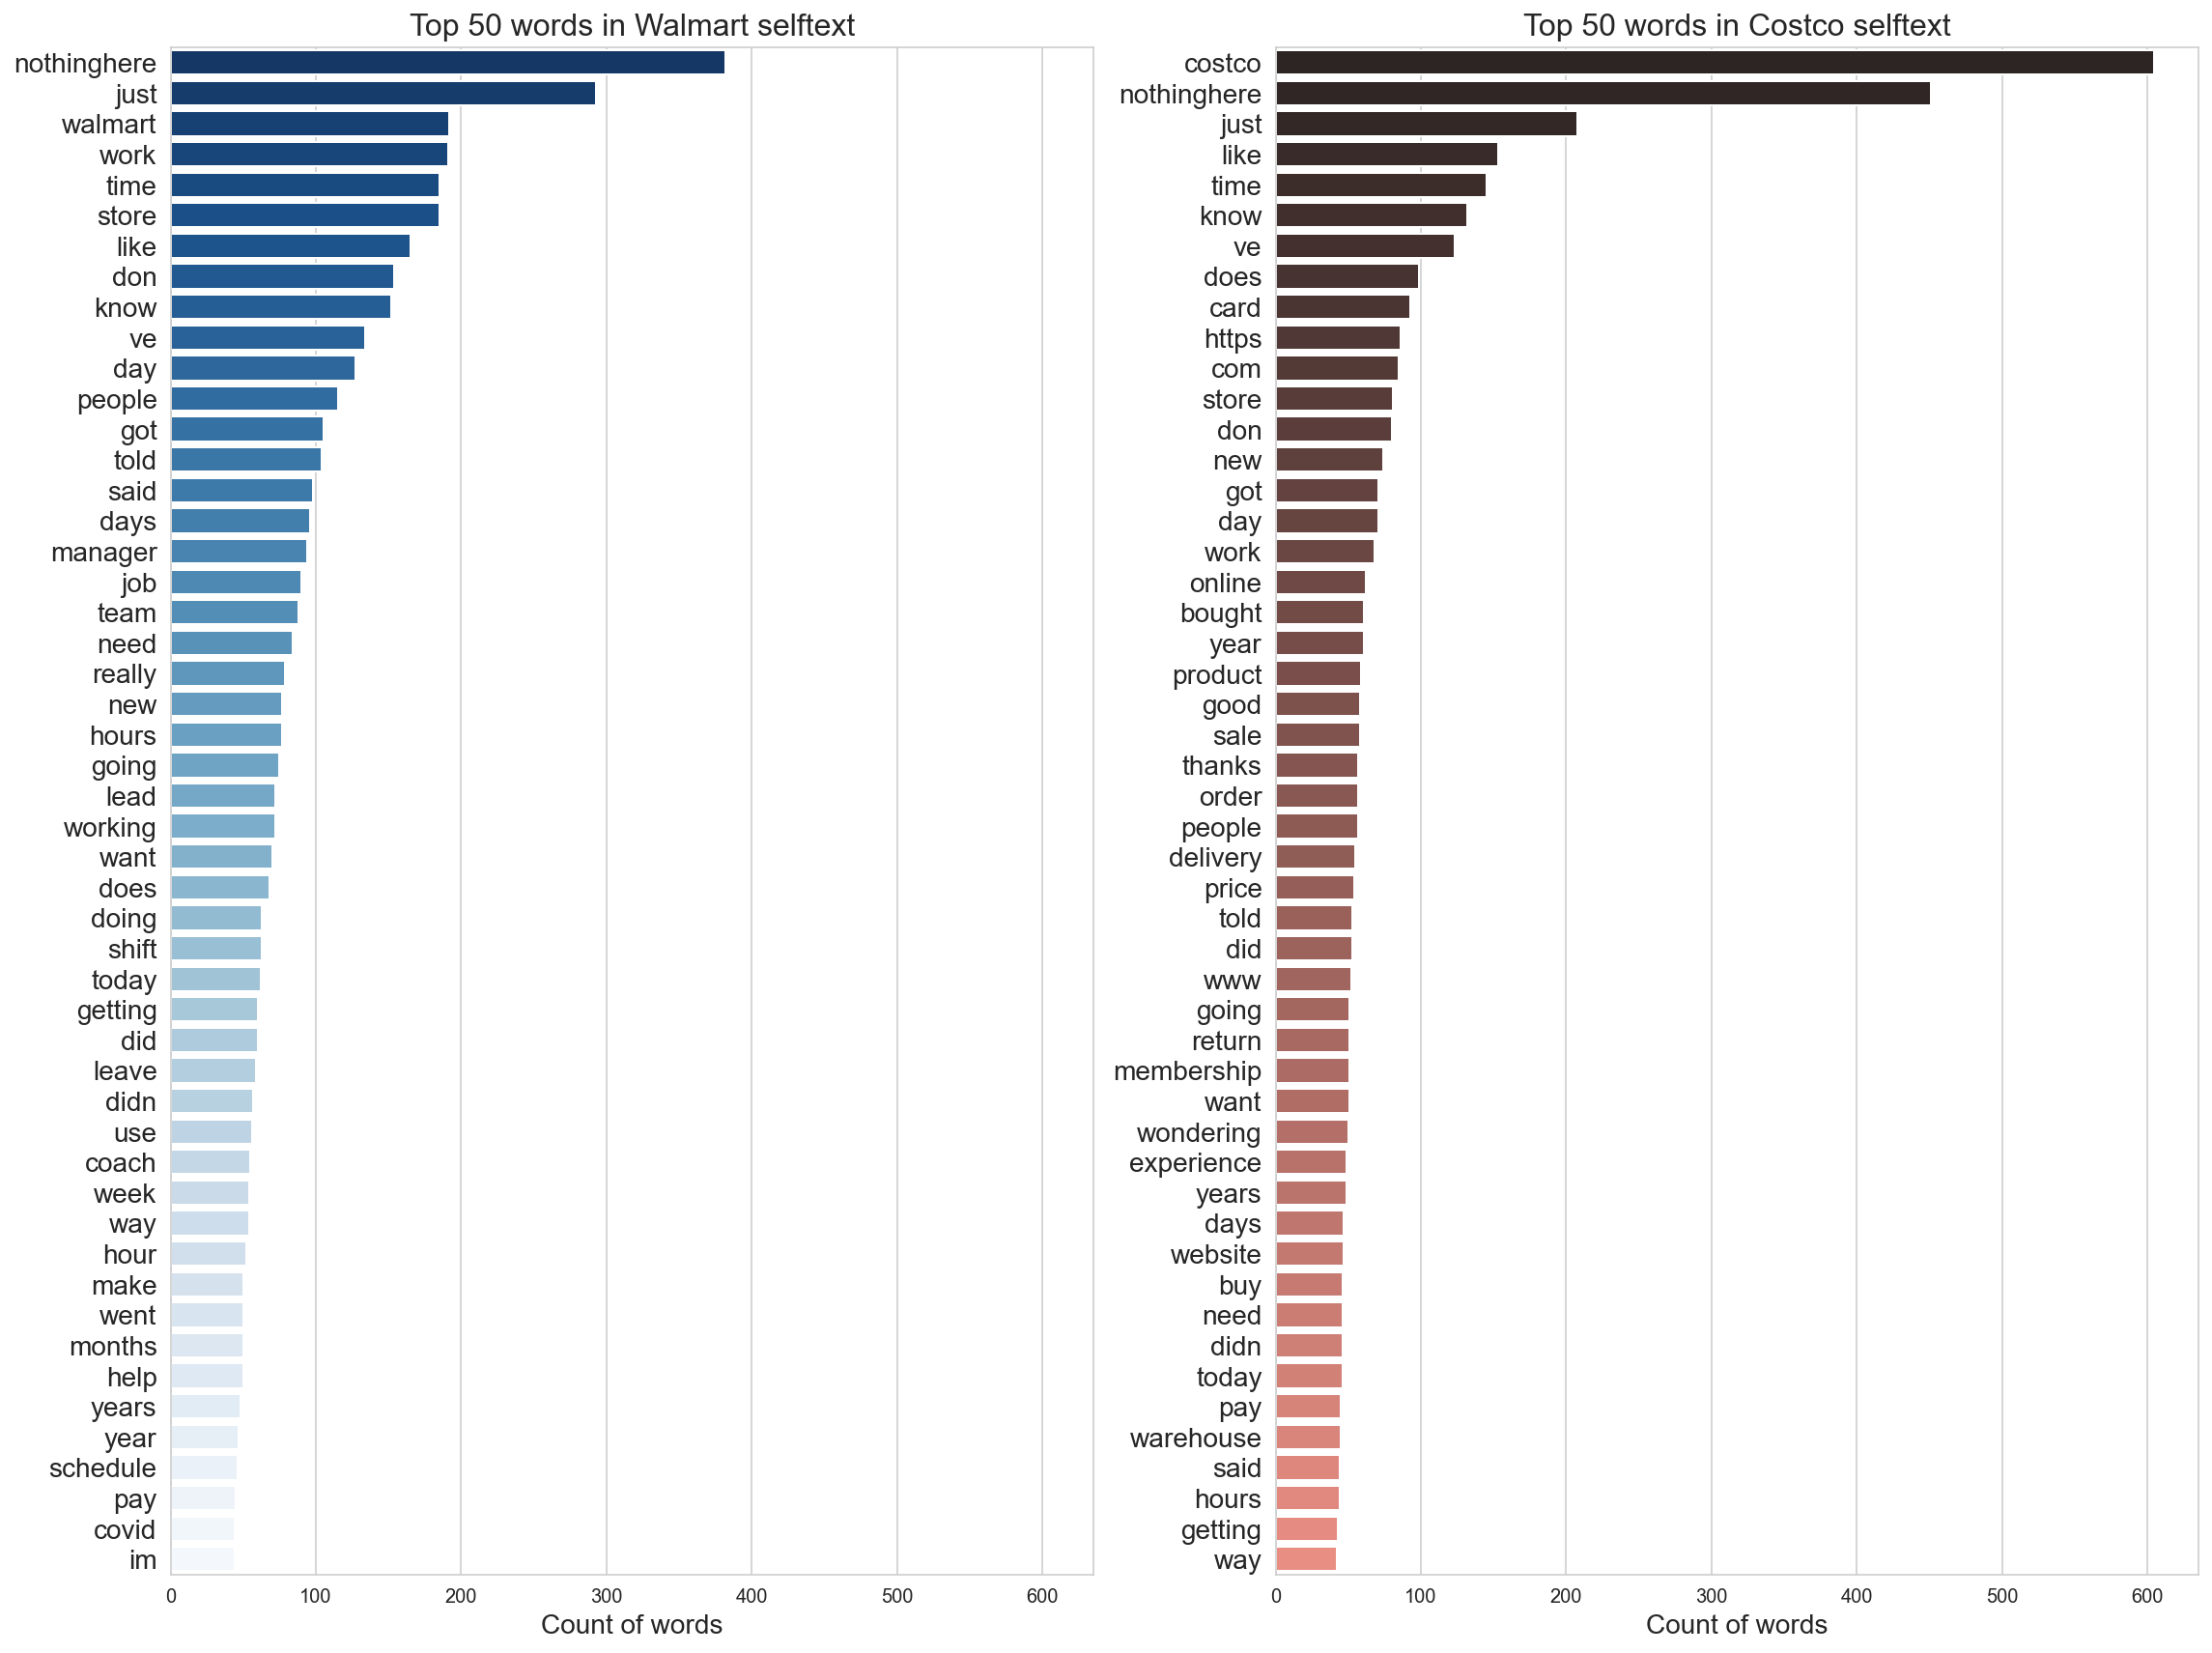

In [24]:
# plot results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,12), sharex=True)

# plot results for Walmart
sns.barplot(y=walmart_post_50.index.values, x=walmart_post_50, palette='Blues_r', ax=ax[0])
ax[0].set_title('Top 50 words in Walmart selftext',fontsize=16)
ax[0].set_xlabel('Count of words', fontsize=14)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

# plot results for Costco
sns.barplot(y=costco_post_50.index.values, x=costco_post_50, palette='dark:salmon', ax=ax[1])
ax[1].set_title('Top 50 words in Costco selftext',fontsize=16)
ax[1].set_xlabel('Count of words', fontsize=14)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()

- Similar to the titles, we observe that the top words that commonly appear in the respective subreddits include: 
    - Walmart: 'walmart', 'work', 'time', 'store', 'people', 'manager'
    - Costco: 'costco', 'time', 'card', 'new', 'online', 'day'

#### Most common two-word phrases under 'selftext'

In [25]:
# instantiate CountVectorizer (one-word, with stop words removed)
cvec = CountVectorizer(ngram_range=(2,2), stop_words='english')

# Walmart - fit/transform the CountVectorizer to the selftext and obtain the top 50 words with the highest count
walmart_cvec = cvec.fit_transform(walmart_df['selftext'])
walmart_cvec = pd.DataFrame(walmart_cvec.toarray(), 
                            columns = cvec.get_feature_names())
walmart_post_50 = walmart_cvec.sum().sort_values(ascending=False).head(50)

# Costco - fit/transform the CountVectorizer to the selftext and obtain the top 50 words with the highest count
costco_cvec = cvec.fit_transform(costco_df['selftext'])
costco_cvec = pd.DataFrame(costco_cvec.toarray(), 
                           columns = cvec.get_feature_names())
costco_post_50 = costco_cvec.sum().sort_values(ascending=False).head(50)

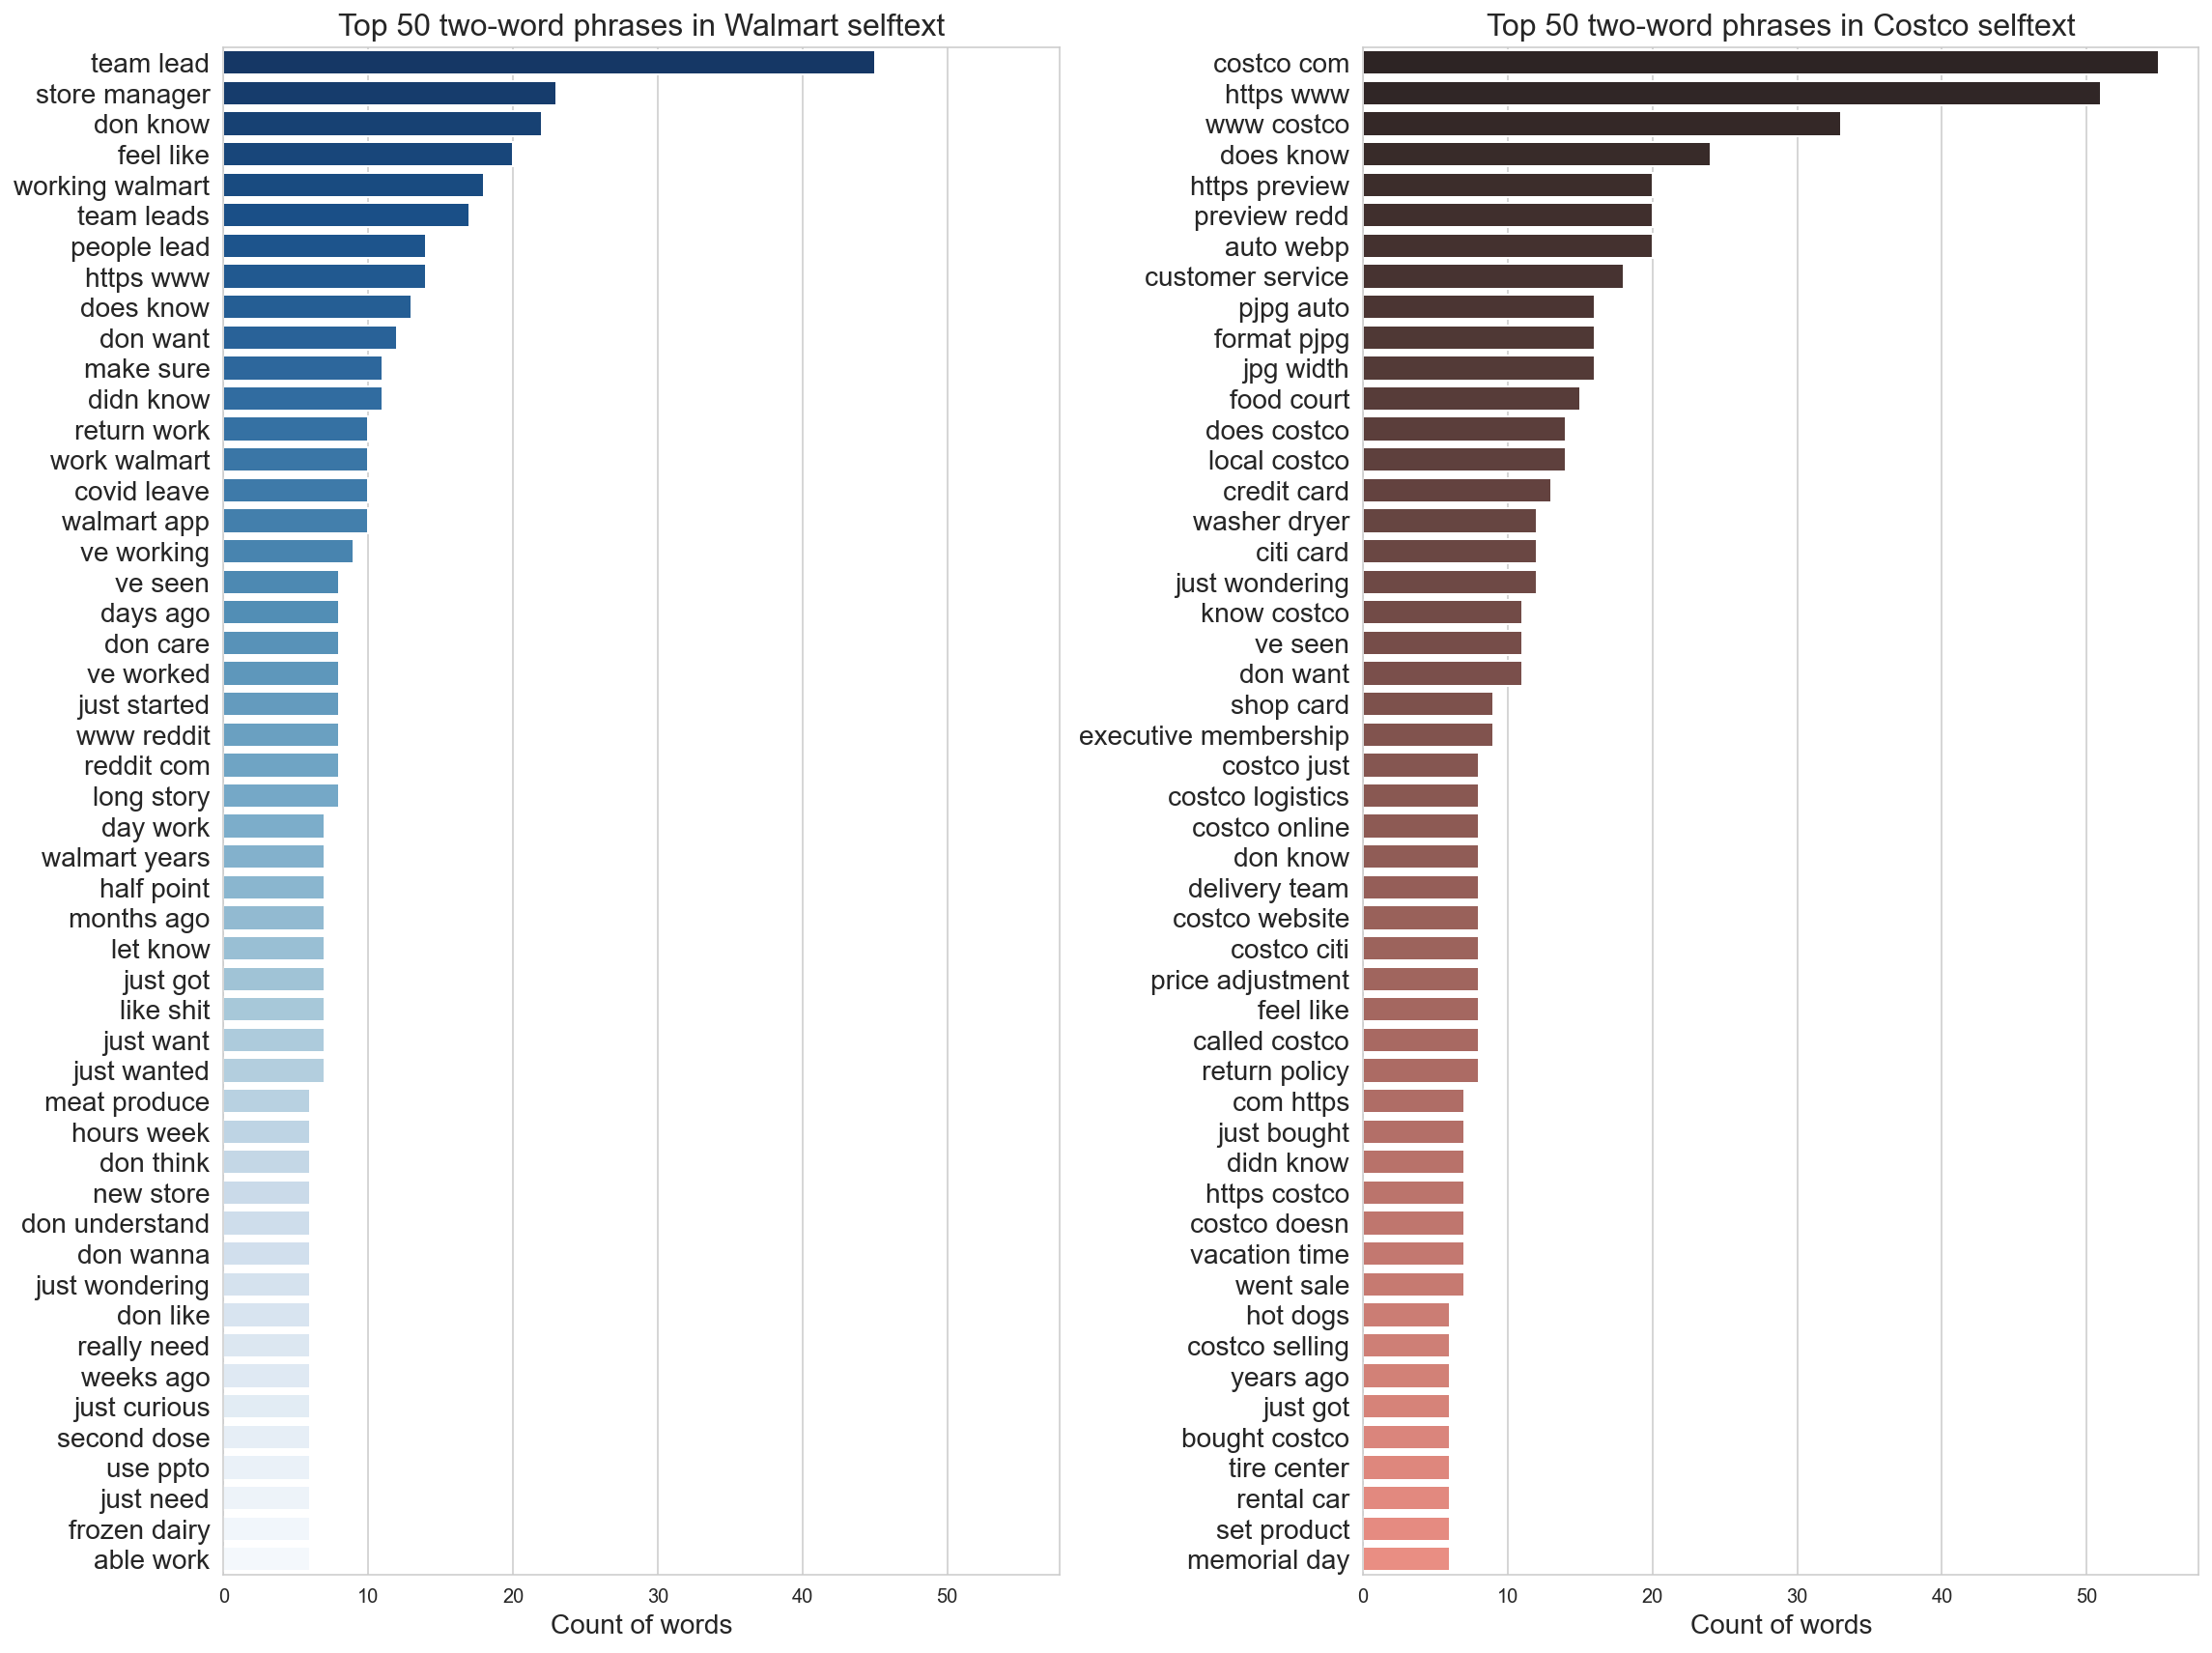

In [26]:
# plot results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,12), sharex=True)

# plot results for Walmart
sns.barplot(y=walmart_post_50.index.values, x=walmart_post_50, palette='Blues_r', ax=ax[0])
ax[0].set_title('Top 50 two-word phrases in Walmart selftext',fontsize=16)
ax[0].set_xlabel('Count of words', fontsize=14)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

# plot results for Costco
sns.barplot(y=costco_post_50.index.values, x=costco_post_50, palette='dark:salmon', ax=ax[1])
ax[1].set_title('Top 50 two-word phrases in Costco selftext',fontsize=16)
ax[1].set_xlabel('Count of words', fontsize=14)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()

- Similar to the titles, it also becomes apparent from the list of two-word phrases obtained from the 'selftext' that:
    - The Walmart subreddit contains more posts from employees sharing their thoughts/feelings about working at Walmart, mainly their unhappiness. 
    - On the other hand, the Costco subreddit contains mainly posts from customers, sharing contents such as website URLs ('www') and images ('jpg').
    
    
- As the contents in the 'title' and 'selftext' are similar, we will be using the contents from 'titles' for further pre-processing subsequently. Therefore, null values in 'selftext' (now represented by 'nothinghere') need not be dropped nor handled separately. 

#### Most common two-word phrases under 'title' - using Word Cloud

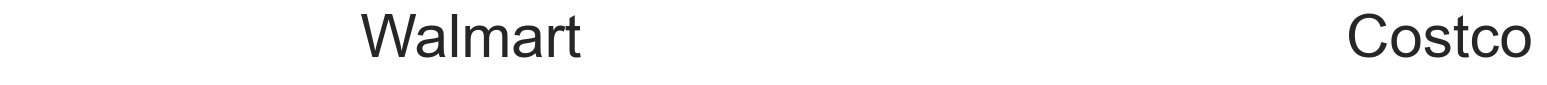

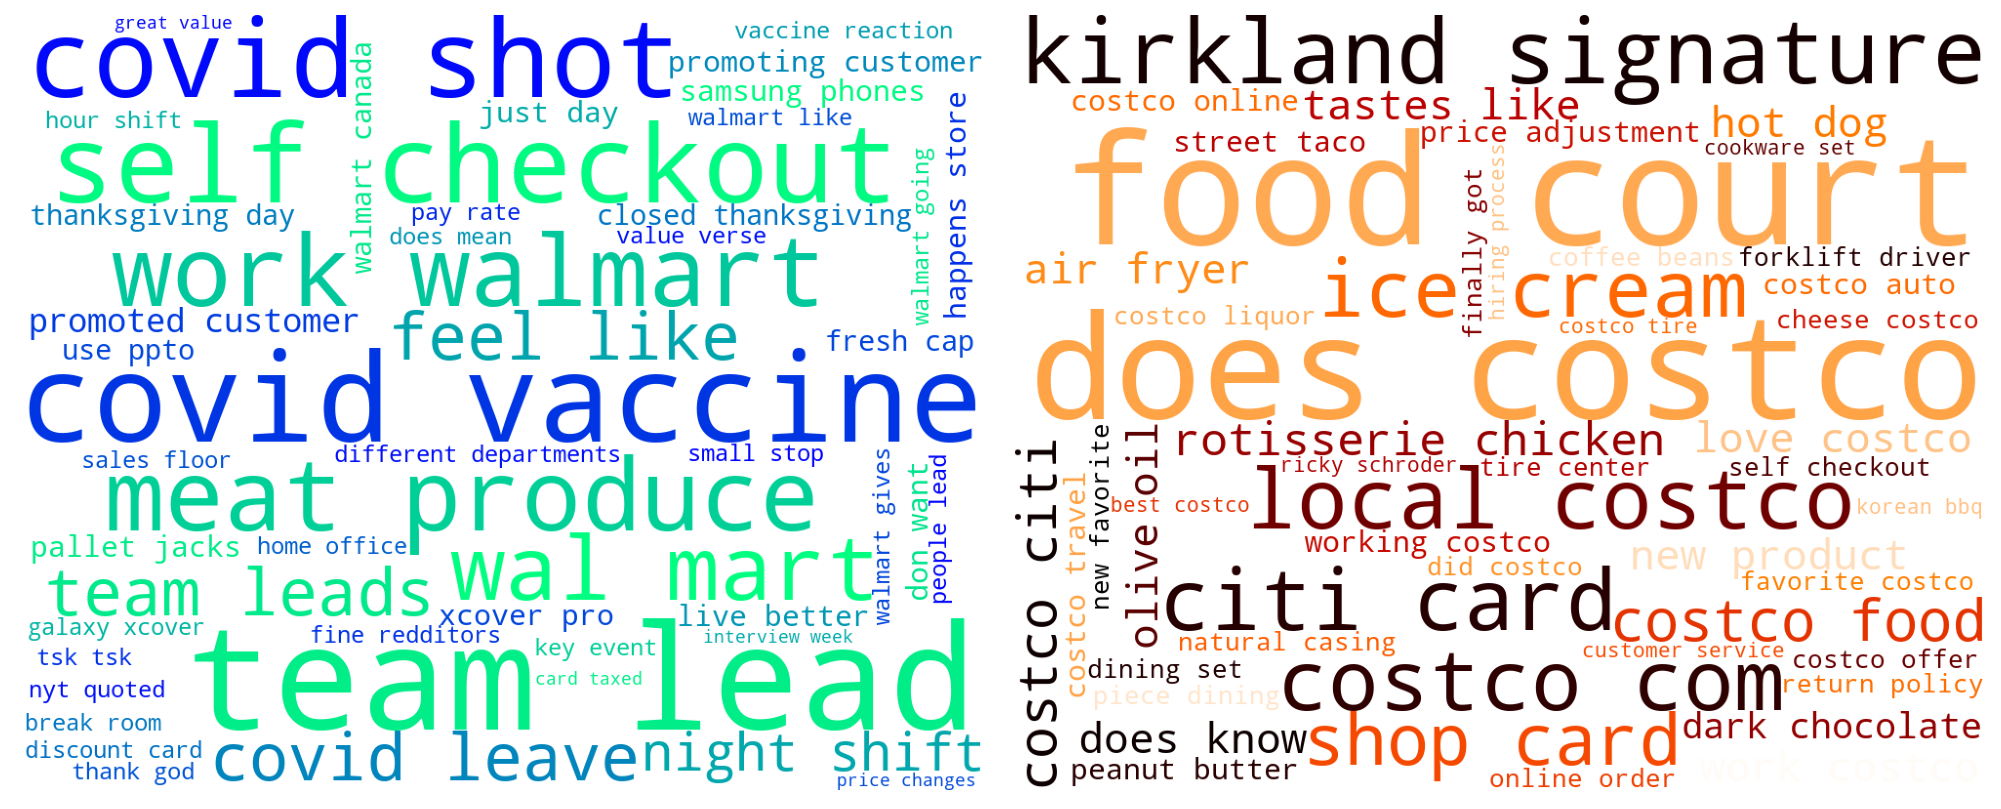

In [27]:
# set up WordCloud
wc_walmart = WordCloud(max_words=50, width=1000, height=800, background_color='white',
                       colormap='winter').generate_from_frequencies(walmart_title_50) 

wc_costco = WordCloud(max_words=50, width=1000, height=800, background_color ='white',
                      colormap='gist_heat').generate_from_frequencies(costco_title_50) 

plt.figure(figsize=(8,0.3))
plt.text(x=0.35,                              
         y=0.9,                             
         s='  Walmart                                              Costco', 
         ha='left',                        
         va='center',                       
         size=30)                         
plt.axis('off')

# plot the WordCloud image 
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
ax[0].imshow(wc_walmart)
ax[0].axis('off')
ax[1].imshow(wc_costco)
ax[1].axis('off')
plt.tight_layout()

From the above word cloud images, we are keen to understand why some two-word phrases appear more commonly than others, on Walmart and Costco's subreddits.

**For Walmart:**
- **'team lead'**: A team-based operating model was introduced in Walmart in May 2019, where small teams of associates were created, cross-trained, and given more ownership of their work. (Source: [Serenah McKay (May 2019)](https://www.arkansasonline.com/news/2019/may/03/walmart-tests-new-work-hierarchy-201905/))

- **'covid vaccine'** and **'covid shot'**: Walmart, together with its membership-only retail warehouse Sam's Club, is offering customers and associates free COVID-19 vaccination administrations at their pharmacy locations nationwide, across 49 states. (Source: [Walmart Corporate (May 2021)](https://corporate.walmart.com/newsroom/2021/05/04/walmart-and-sams-club-now-administering-walk-up-covid-19-vaccines-at-5-100-pharmacies-nationwide))

- **'self checkout'**: More Walmart stores will be implementing self-checkouts in the stores, and employees who were cashiers previously would be re-assigned to other roles such as self-checkout hosts, online grocery pickups and other front ends positions, etc. (Source: [CBC News (June 2021)](https://www.cbc.ca/news/canada/british-columbia/terrace-walmart-self-checkout-1.6067061))

- **'covid leave'**: A COVID-19 emergency leave policy was introduced in March 2020, where full-time and part-time associates would receive up to two weeks of salary should they be required to stay home for COVID-19 related reasons (i.e. mandated quarantines, symptoms, illnesses, etc.). (Source: [John Furner (March 2020)](https://corporate.walmart.com/newsroom/2020/03/10/new-covid-19-policy-to-support-the-health-of-our-associates))


**For Costco:**
- **'food court'** and **'rotisserie chicken'**: Costco is known for its food court, with popular items like the quarter pound hot dog and refillable drink at USD 1.50 (price has remained the same since 1985), and rotisserie chicken at USD 4.99. (Source: [Henry Bewicke (May 2021)](https://www.talon.one/blog/what-we-can-learn-from-costcos-promotion-strategy))

- **'kirkland signature'**: Kirkland Signature is Costco's house brand, which is known for its high-quality and low-cost products, as compared to similar products from other brands. (Source: [Agela (September 2020)](https://hip2save.com/tips/brands-behind-costco-kirkland-signature/))

- **'citi card'**: The Costco Anywhere Visa® Card by Citi was introduced in May 2021, offering Costco members cashback options (ranges from 1% to 4%) across a variety of categories such as gas, restaurants and purchases from Costco. (Source: [Ryan Haar (May 2020)](https://time.com/nextadvisor/credit-cards/citi/costco-card-benefits/))

### 4. Data Cleaning & Feature Engineering

For this section, we will be creating new features such as the character count in the 'title' column, to explore if any relationships exist between Walmart and Costco subreddits. Any outliers identified may be removed from the datasets.

#### In the Walmart subreddit

In [28]:
# create a new column to store the number of characters in the 'title' column
walmart_df['title_char_len'] = walmart_df['title'].str.len()

# create a new column to store the number of words in the 'title' column
walmart_df['title_word_count'] = walmart_df['title'].apply(lambda x: len(x.split()))

In [29]:
# view the numerical description
walmart_df.describe()

,num_comments,score,title_char_len,title_word_count
count,926.000000,926.000000,926.000000,926.000000
mean,12.633909,45.983801,44.852052,8.295896
std,19.752821,204.739605,38.905467,7.516823
min,0.000000,0.000000,1.000000,1.000000
25%,4.000000,1.000000,19.000000,3.000000
50%,8.000000,4.000000,33.000000,6.000000
75%,15.000000,22.000000,58.750000,11.000000
max,434.000000,4912.000000,294.000000,56.000000


It is interesting to note that: 
- The mean number of comments per post is 12.6, higher than its median value of 8.0.
- The mean score of posts is 46.0, way higher than its median value of 4.0; it's worthwhile to note that the score can go up to a maximum of 4912. 
- The mean character length of the titles are 44.8, above its median value of 33; its maximum value reaches 294, yet its minimum value is 1. This calls for further investigation.
- The mean word count of the titles are 8.3, slightly above its median value of 6; its maximum value reaches 56.

In [30]:
# view the posts that have titles of 1 character length
walmart_df[(walmart_df['title_char_len'] == 1)]

,author,created_utc,id,num_comments,score,selftext,subreddit,title,url,title_char_len,title_word_count
33,absol2019,2021-06-10 19:11:08,nwkycw,0,1,nothinghere,walmart,?,https://i.redd.it/s3nrz81l8f471.jpg,1,1
688,Big_Trust1908,2021-06-04 06:50:06,nrqa3m,10,120,nothinghere,walmart,😅,https://i.redd.it/rfjmd8xwq4371.jpg,1,1


- It can be seen that one of the post contains a smiley emoticon, while the other contains a '?'. 
- Since they will not be useful for predicting whether a post belongs to Walmart, they will be removed. 

In [31]:
# drop the rows with index 33 and 688 from the Walmart_df
walmart_df.drop(index=[33,688], inplace=True)

#### In the Costco subreddit

In [32]:
# create a new column to store the number of characters in the 'title' column
costco_df['title_char_len'] = costco_df['title'].str.len()

# create a new column to store the number of words in the 'title' column
costco_df['title_word_count'] = costco_df['title'].apply(lambda x: len(x.split()))

In [33]:
# view the numerical description
costco_df.describe()

,num_comments,score,title_char_len,title_word_count
count,973.000000,973.000000,973.000000,973.000000
mean,21.993834,84.344296,56.429599,9.883864
std,30.719057,213.376909,45.207278,8.483698
min,0.000000,0.000000,6.000000,1.000000
25%,6.000000,3.000000,27.000000,4.000000
50%,13.000000,12.000000,44.000000,7.000000
75%,23.000000,52.000000,71.000000,13.000000
max,273.000000,1769.000000,300.000000,56.000000


It is interesting to note that:
- The mean number of comments per post is 22.0, higher than its median value of 13.0.
- The mean score of posts is 84.3, way higher than its median value of 12.0; it's worthwhile to note that the score can go up to a maximum of 1769.
- The mean character length of the titles are 56.4, above its median value of 44; its maximum value reaches 300.
- The mean word count of the titles are 9.9, slightly above its median value of 7; its maximum value reaches 56.

We will do a comparison to determine whether the same post is present in both Walmart and Costco subreddits.

In [34]:
# check if a Walmart submisssion is present in Costco subreddit, using 'title'
walmart_df[walmart_df['title'].isin(costco_df['title']) == True]

,author,created_utc,id,num_comments,score,selftext,subreddit,title,url,title_char_len,title_word_count


In [35]:
# check if a Costco submisssion is present in Walmart subreddit, using 'title'
costco_df[costco_df['title'].isin(walmart_df['title']) == True]

,author,created_utc,id,num_comments,score,selftext,subreddit,title,url,title_char_len,title_word_count


- Fortunately, there are no posts that are present in both Walmart and Costco subreddits.

### 5. Visualizing relationships between Walmart and Costco subreddits

In this section, a series of histograms, boxplots and bar charts will be created to explore the relationships between the existing features in both Walmart and Costco subreddits.

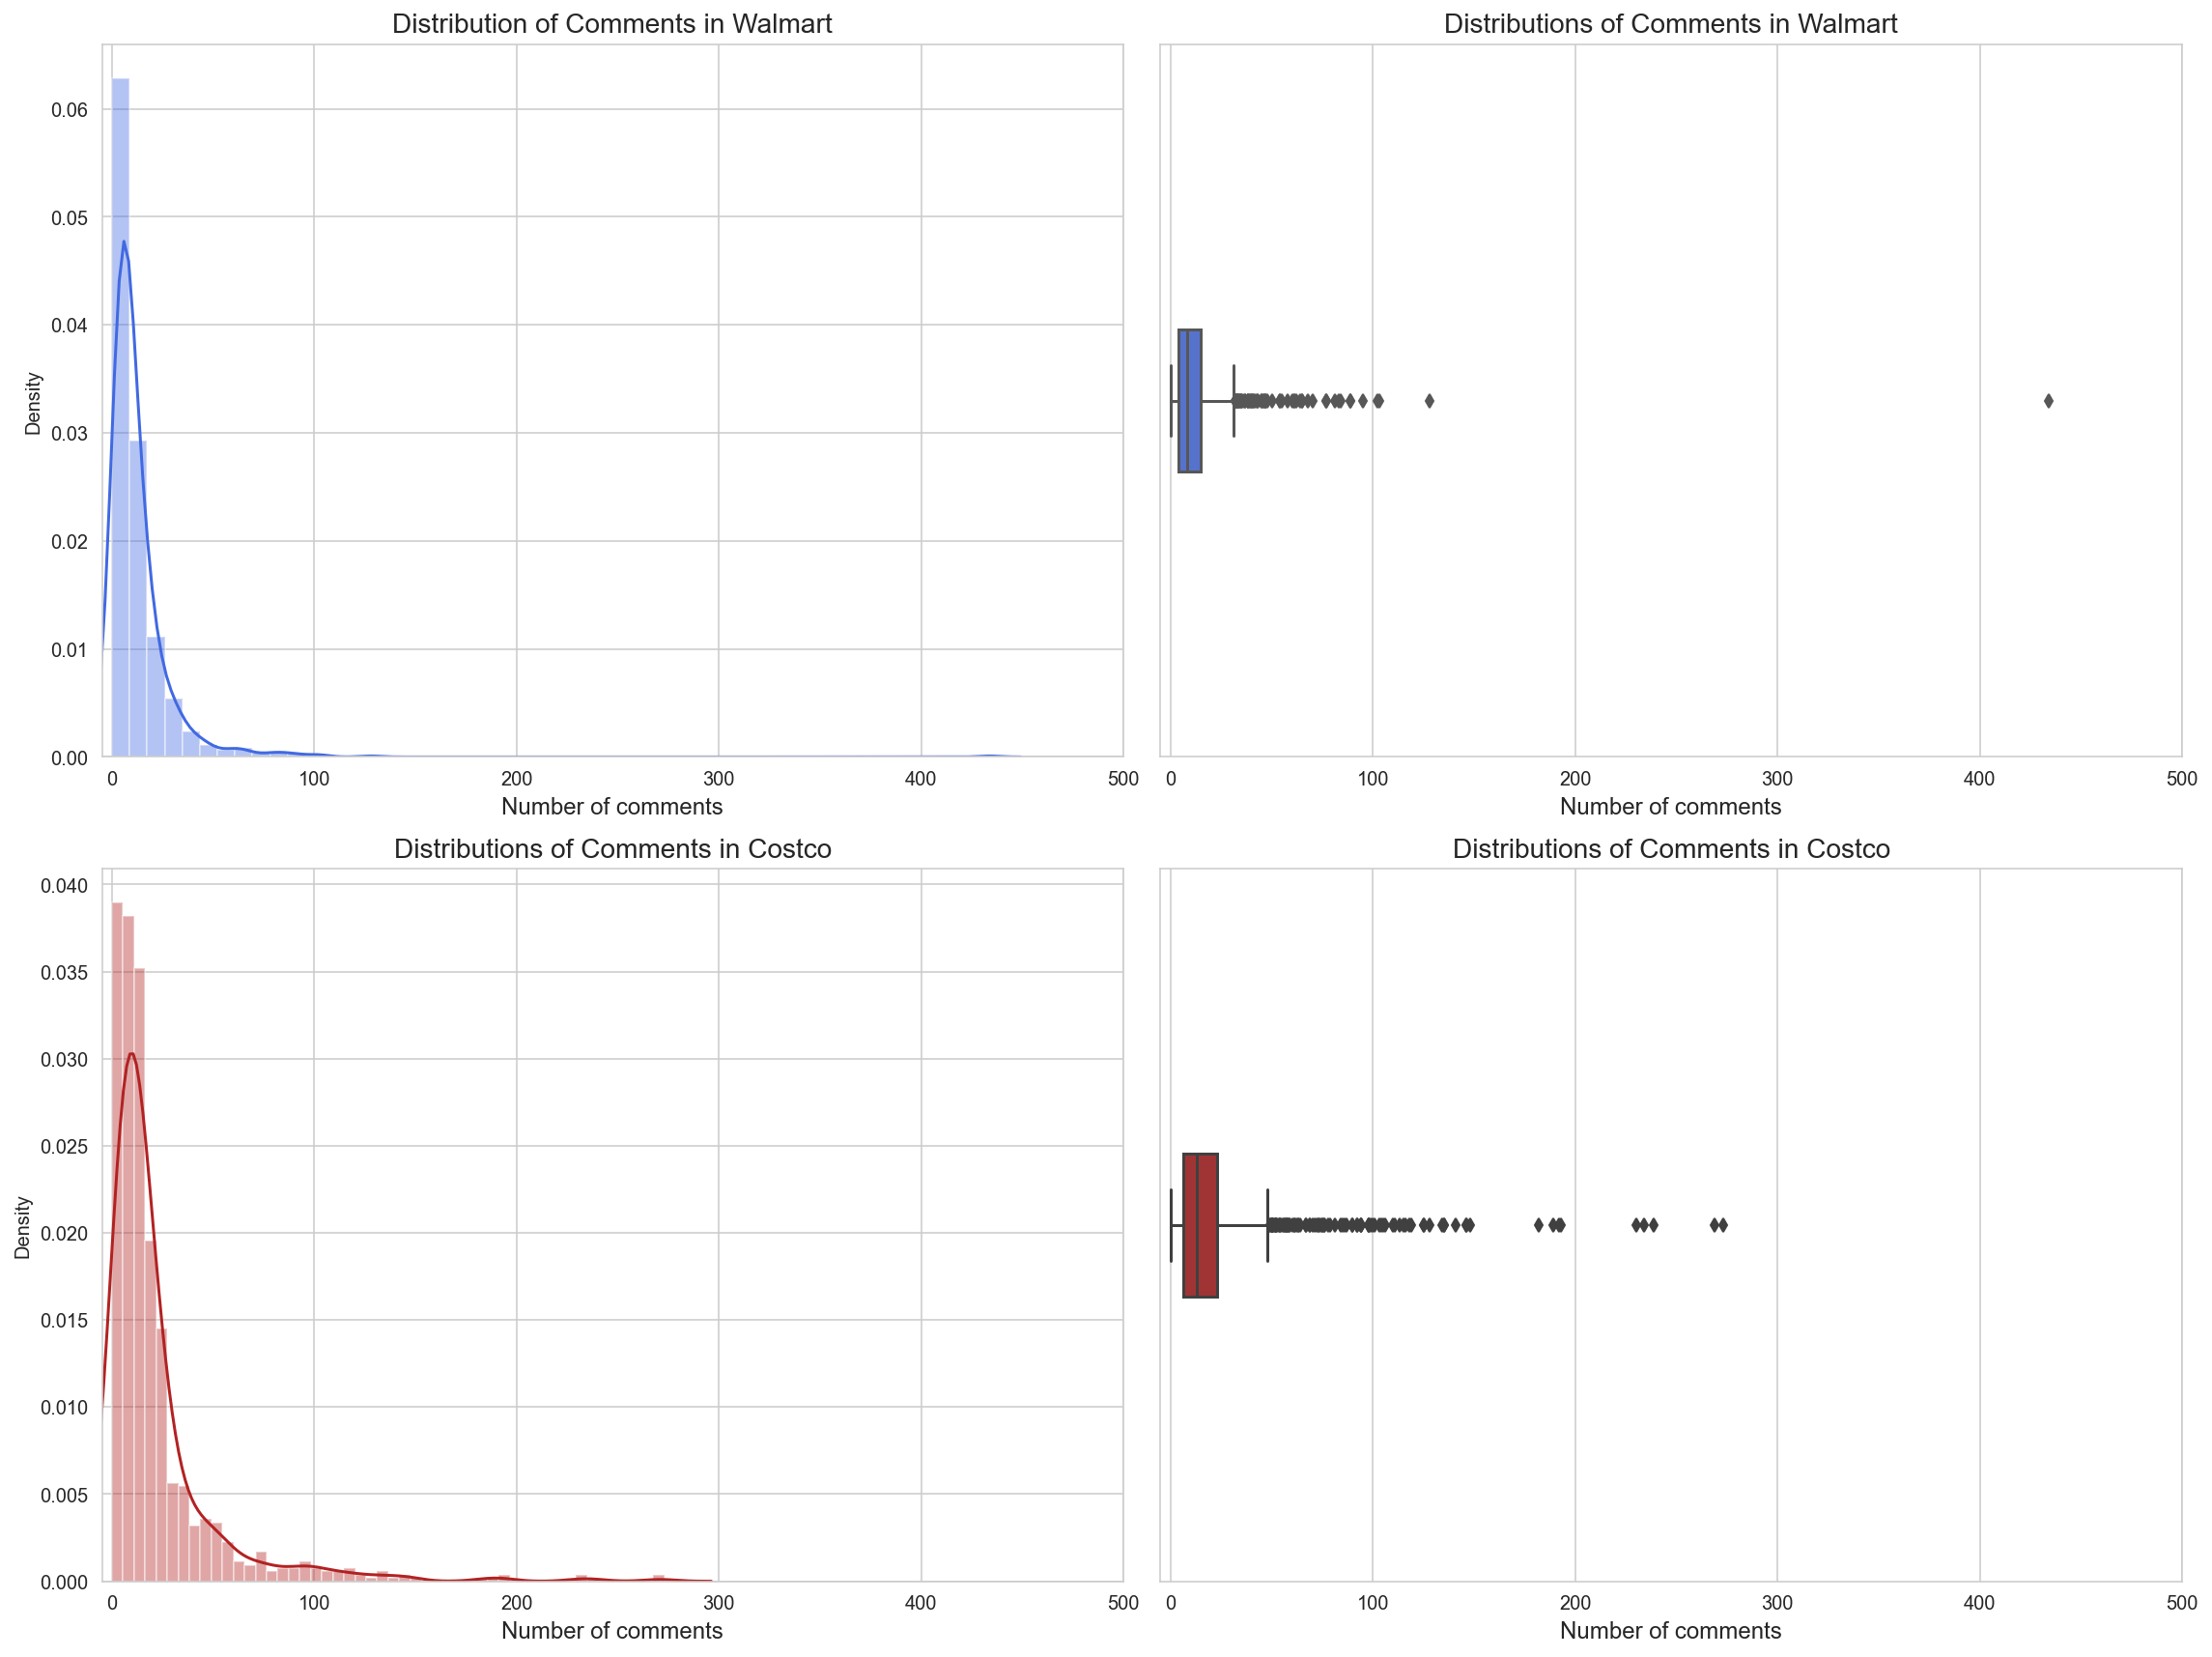

In [36]:
# plot distributions of comments using distplot and boxplot, keeping the same x axis range

fig,ax = plt.subplots(nrows=2, ncols =2, figsize=(16,12))

sns.distplot(walmart_df['num_comments'], ax=ax[0][0], color='royalblue')
ax[0][0].set_xlabel('Number of comments', fontsize=12)
ax[0][0].set_xlim(-5,500)
ax[0][0].set_title('Distribution of Comments in Walmart', fontsize=14)

sns.boxplot(walmart_df['num_comments'], ax=ax[0][1], width=0.2, color='royalblue')
ax[0][1].set_xlabel('Number of comments', fontsize=12)
ax[0][1].set_xlim(-5,500)
ax[0][1].set_title('Distributions of Comments in Walmart', fontsize=14)

sns.distplot(costco_df['num_comments'], ax=ax[1][0], color='firebrick')
ax[1][0].set_xlabel('Number of comments', fontsize=12)
ax[1][0].set_xlim(-5,500)
ax[1][0].set_title('Distributions of Comments in Costco', fontsize=14)

sns.boxplot(costco_df['num_comments'], ax = ax[1][1], width=0.2, color='firebrick')
ax[1][1].set_xlabel('Number of comments', fontsize=12)
ax[1][1].set_xlim(-5,500)
ax[1][1].set_title('Distributions of Comments in Costco', fontsize=14)

plt.tight_layout()

- It is interesting to note that one particular post for Walmart has obtained above 400 comments, whereas the highest number of comments received by one post in Cost is close to 300.
    - This is likely referring to the first post on the respective subreddit pages, which has been upvoted to be viewed by all users who land on the pages, and therefore generating the highest number of comments. 
- Majority of the Walmart and Costco posts tend to receive less than 50 comments, as represented by the right-skew in the distribution.

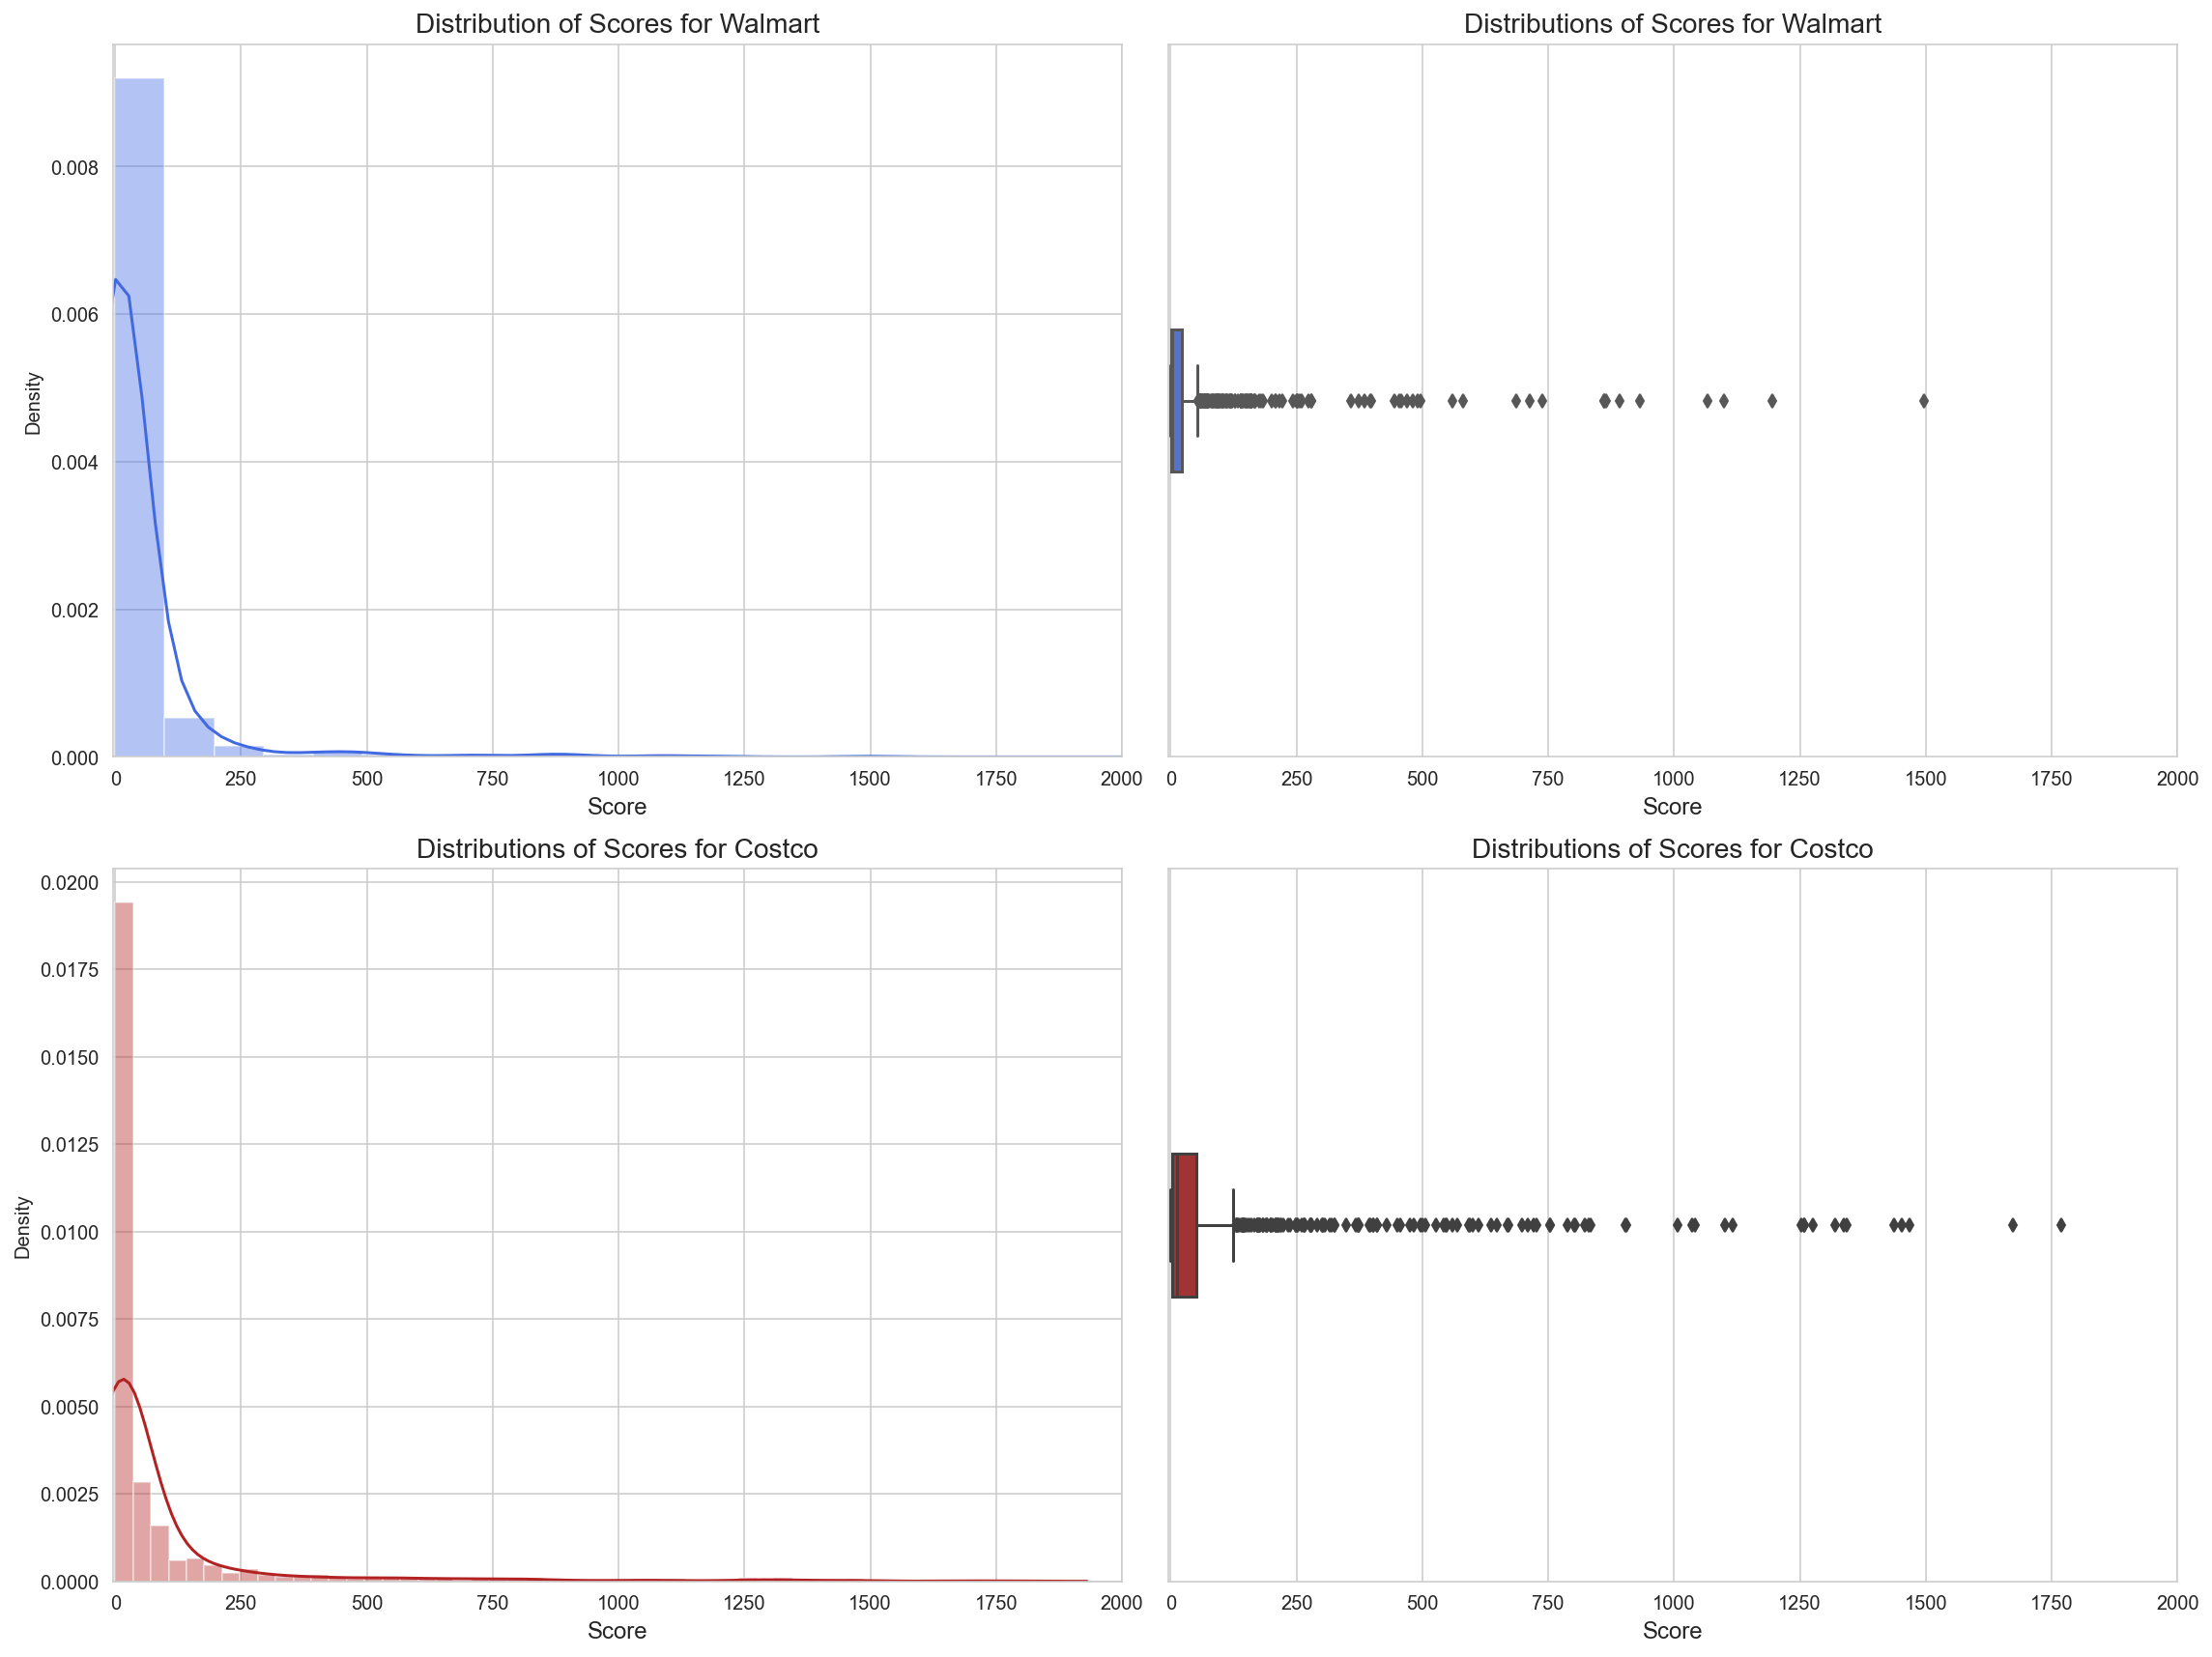

In [37]:
# plot distributions of the score using distplot and boxplot, keeping the same x axis range
# note that there is one post in Walmart with an outlier score of 5000
# however to optimise the graph for viewing, the maximum range is set to 2000

fig,ax = plt.subplots(nrows=2, ncols =2, figsize=(16,12))

sns.distplot(walmart_df['score'], ax=ax[0][0], color='royalblue')
ax[0][0].set_xlabel('Score', fontsize=12)
ax[0][0].set_xlim(-5,2000)
ax[0][0].set_title('Distribution of Scores for Walmart', fontsize=14)

sns.boxplot(walmart_df['score'], ax=ax[0][1], width=0.2, color='royalblue')
ax[0][1].set_xlabel('Score', fontsize=12)
ax[0][1].set_xlim(-5,2000)
ax[0][1].set_title('Distributions of Scores for Walmart', fontsize=14)

sns.distplot(costco_df['score'], ax=ax[1][0], color='firebrick')
ax[1][0].set_xlabel('Score', fontsize=12)
ax[1][0].set_xlim(-5,2000)
ax[1][0].set_title('Distributions of Scores for Costco', fontsize=14)

sns.boxplot(costco_df['score'], ax = ax[1][1], width=0.2, color='firebrick')
ax[1][1].set_xlabel('Score', fontsize=12)
ax[1][1].set_xlim(-5,2000)
ax[1][1].set_title('Distributions of Scores for Costco', fontsize=14)

plt.tight_layout()

- It is interesting to note that one particular post for Walmart has obtained close to 5000 in net upvotes, whereas the highest score for Costco is slightly above 1750. 
    - Similar to the observation for the number of comments, this is likely referring to the first post on the respective subreddit pages, which has been upvoted to be viewed by all users who land on the pages, and therefore attaining the highest score.
- A greater proportion of posts in Walmart have scores below 125, as compared to the posts in Costco. Still, we observe a right-skew in the distribution.

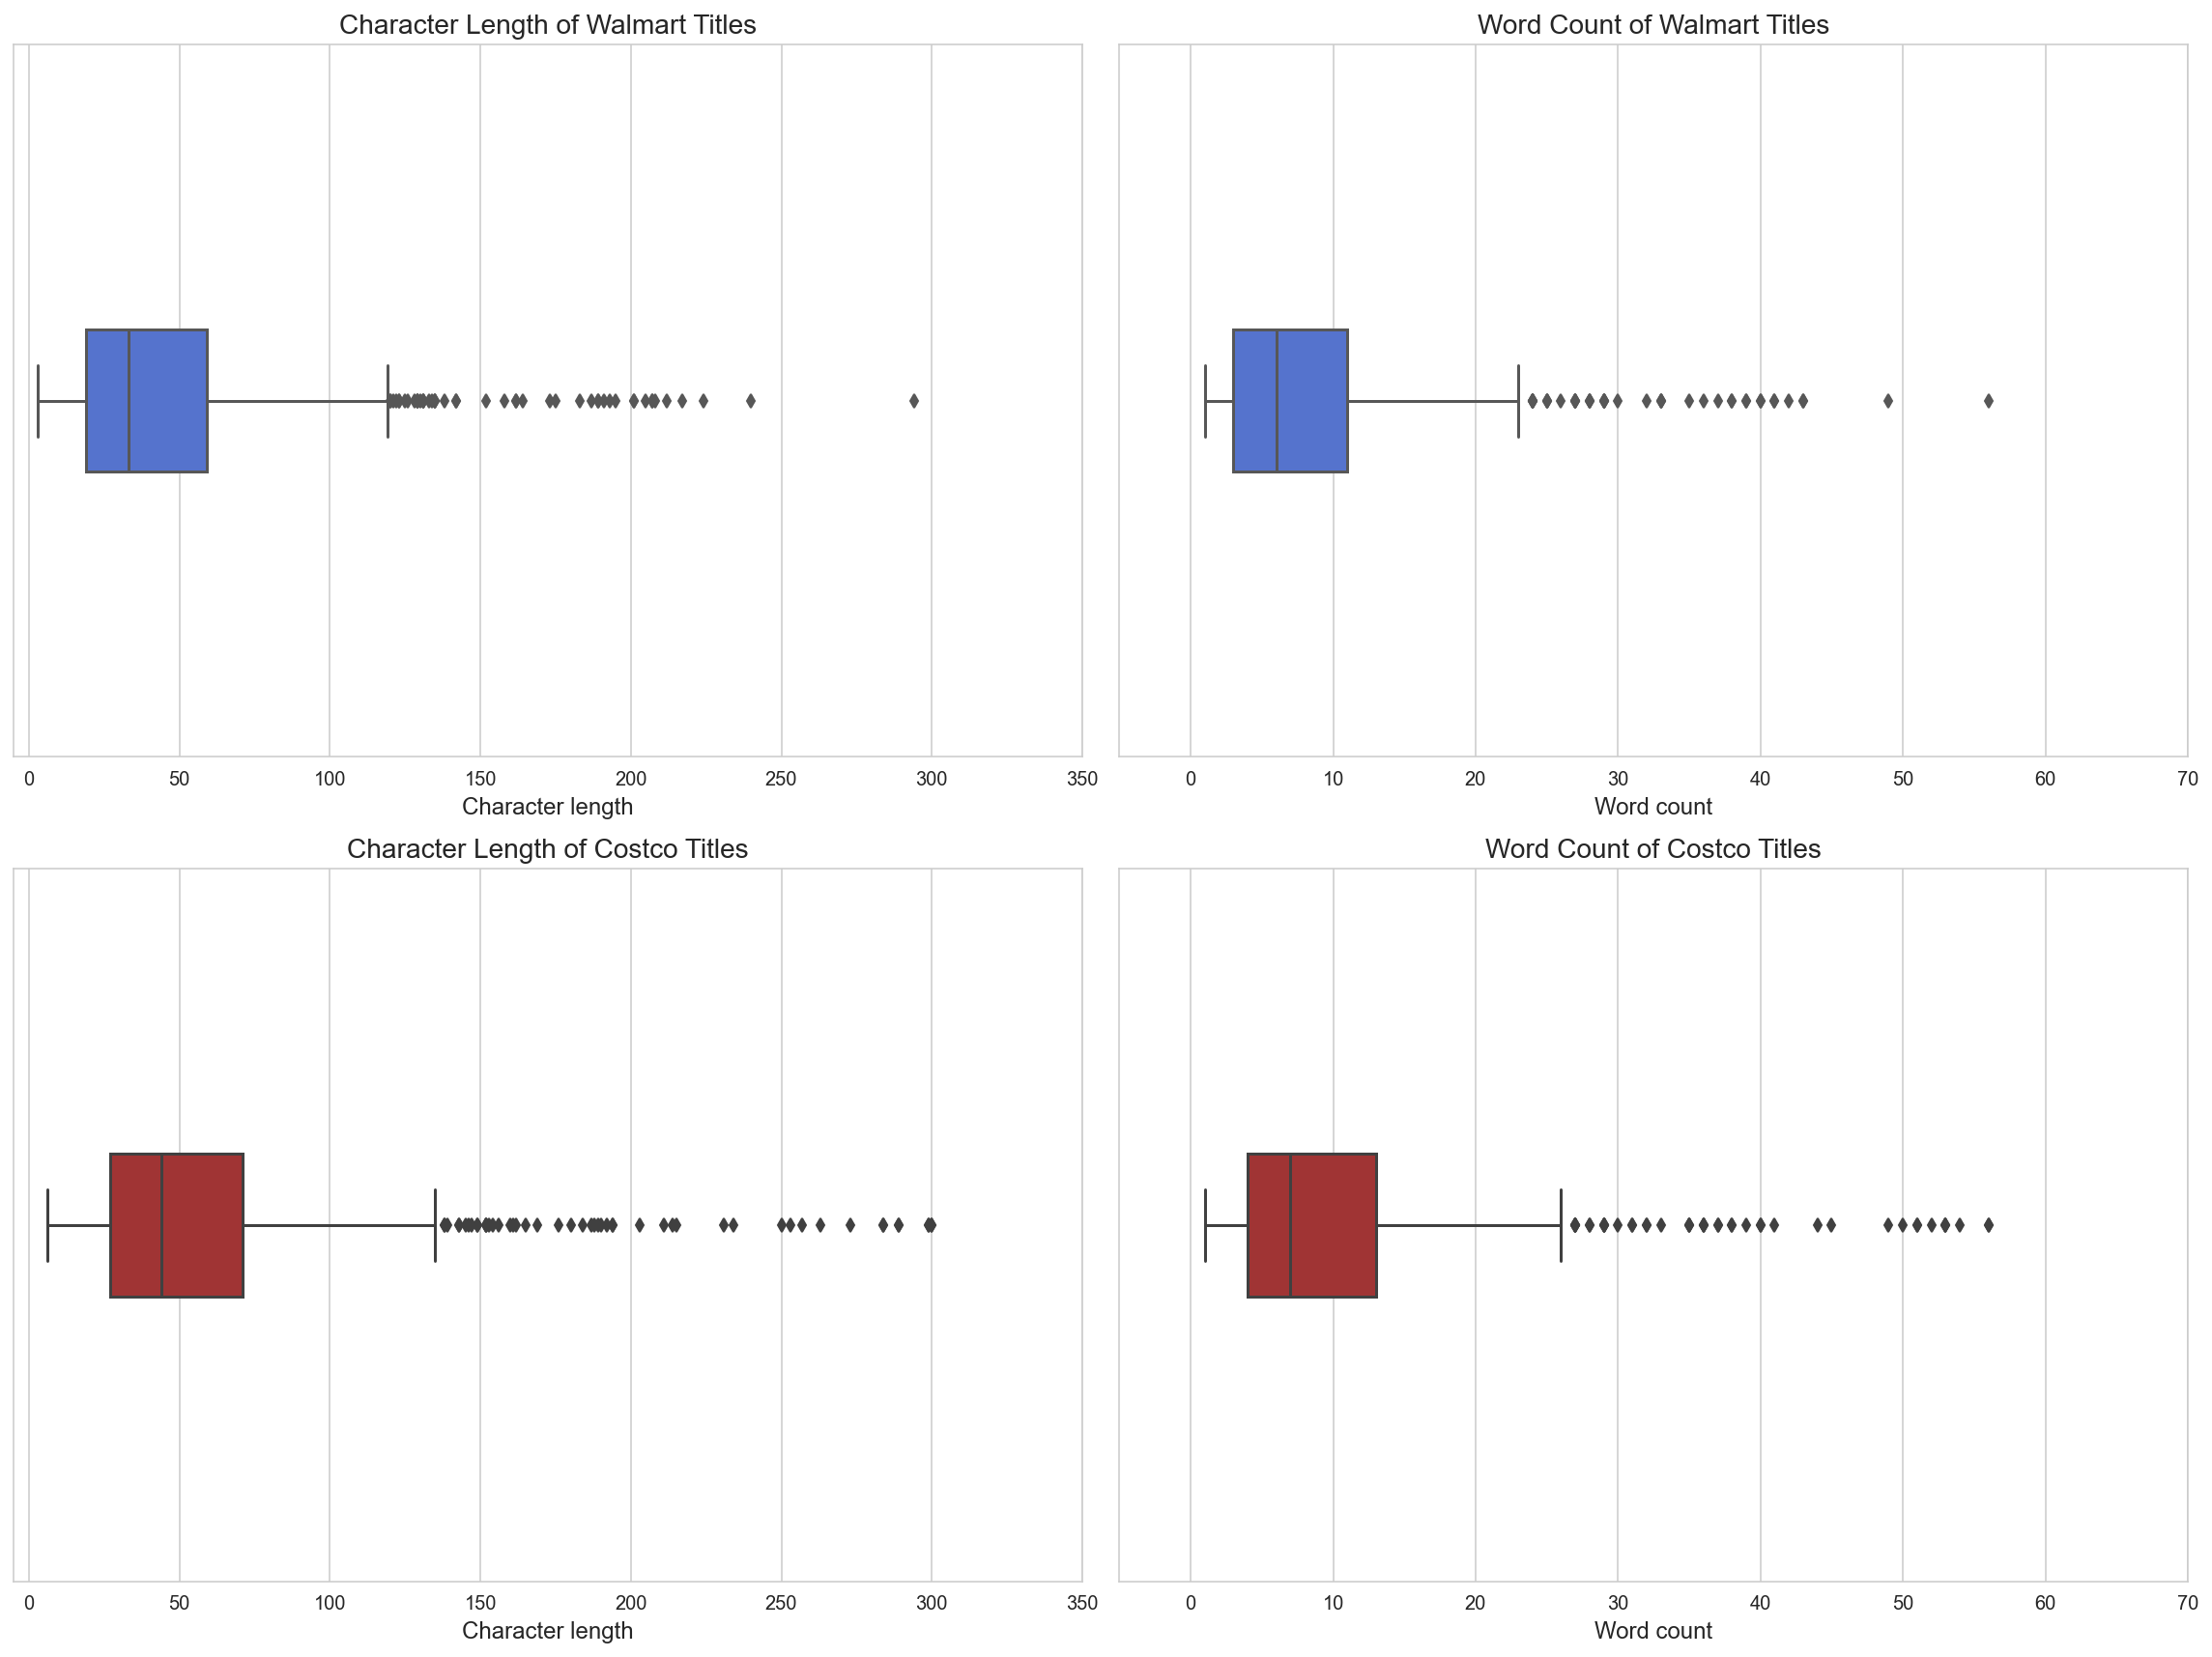

In [38]:
# plot distributions of the title character length and word count using boxplot, keeping the same x axis range
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

sns.boxplot(walmart_df['title_char_len'], ax=ax[0][0], width=0.2, color='royalblue')
ax[0][0].set_xlabel('Character length', fontsize=12)
ax[0][0].set_xlim(-5,350)
ax[0][0].set_title('Character Length of Walmart Titles', fontsize=14)

sns.boxplot(walmart_df['title_word_count'], ax=ax[0][1], width=0.2, color='royalblue')
ax[0][1].set_xlabel('Word count', fontsize=12)
ax[0][1].set_xlim(-5,70)
ax[0][1].set_title('Word Count of Walmart Titles', fontsize=14)

sns.boxplot(costco_df['title_char_len'], ax=ax[1][0], width=0.2, color='firebrick')
ax[1][0].set_xlabel('Character length', fontsize=12)
ax[1][0].set_xlim(-5,350)
ax[1][0].set_title('Character Length of Costco Titles', fontsize=14)

sns.boxplot(costco_df['title_word_count'], ax=ax[1][1], width = 0.2, color='firebrick')
ax[1][1].set_xlabel('Word count', fontsize=12)
ax[1][1].set_xlim(-5,70)
ax[1][1].set_title('Word Count of Costco Titles', fontsize=14)

plt.tight_layout()

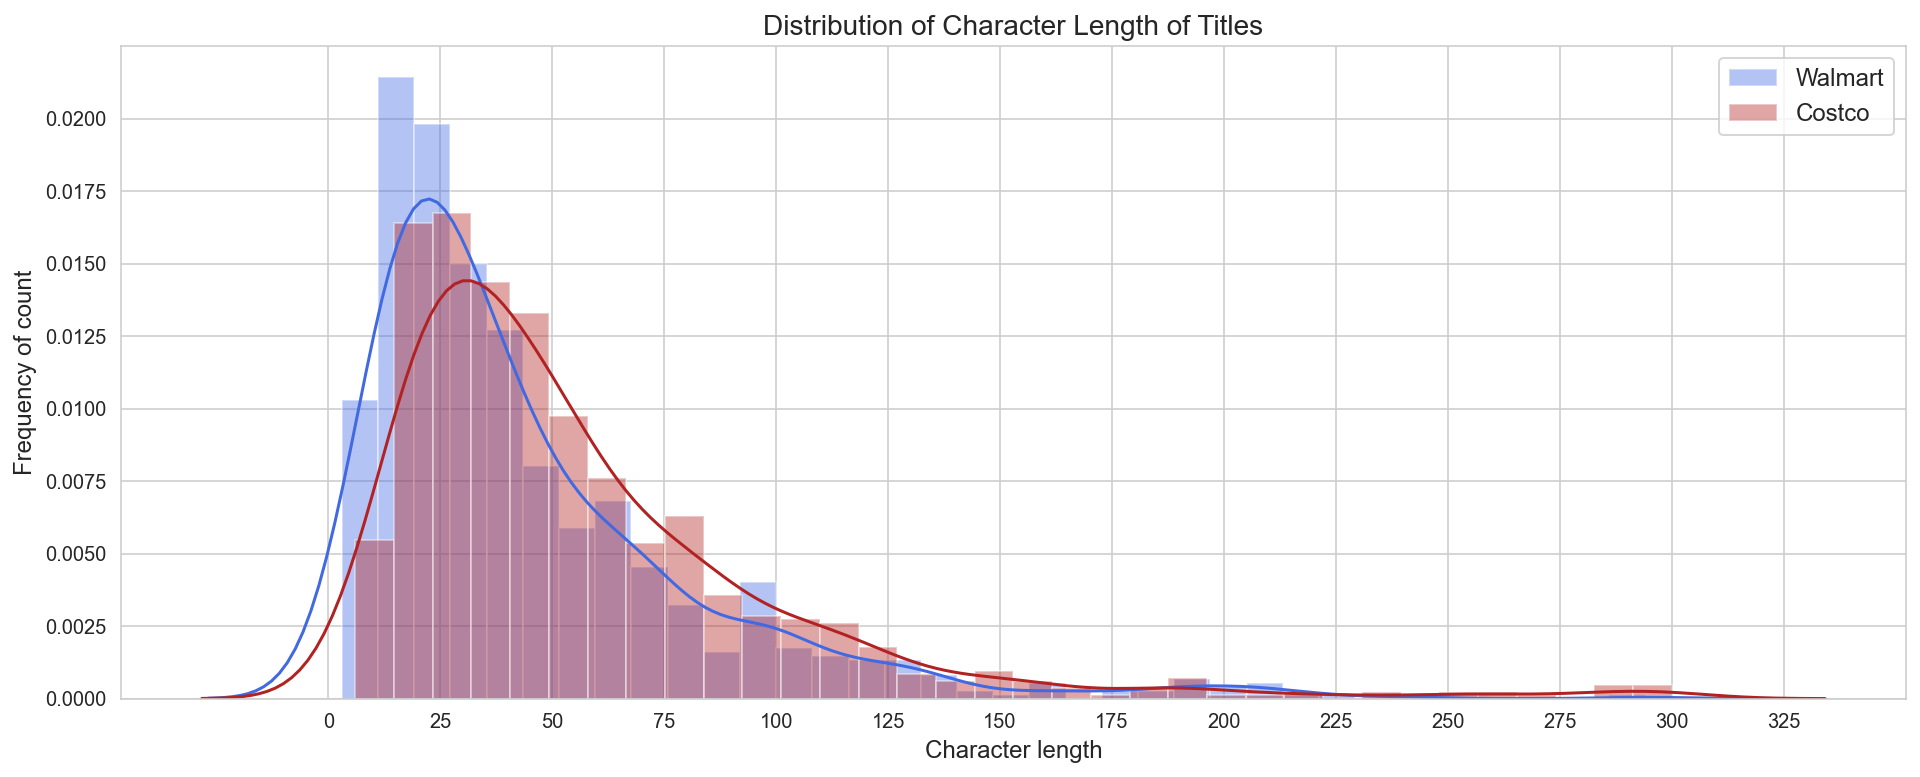

In [39]:
# view the distribution of character length for titles in Walmart and Costco using histogram
plt.figure(figsize=(16, 6))
sns.distplot(walmart_df['title_char_len'], label='Walmart', color='royalblue')
sns.distplot(costco_df['title_char_len'], label='Costco', color='firebrick')
plt.title('Distribution of Character Length of Titles', fontsize=14)
plt.xlabel('Character length', fontsize=12)
plt.xticks(range(0, 350, 25))
plt.ylabel('Frequency of count', fontsize=12)
plt.legend(fontsize='large');

- The distributions of character length of titles for Walmart and Costco are right-tailed, indicating that majority of the posts have character length smaller than 50.0.
- While this may be the case, posts in Walmart seem to have shorter titles than Costco, as seen from the boxplot where the median character length of titles in Walmart (33.0) is less than the median character length of titles in Costco (44.0).   
- Overall, we do observe a large amount of character length of titles that are very similar between both subreddits, as indicated by the overlapping section in purple. 

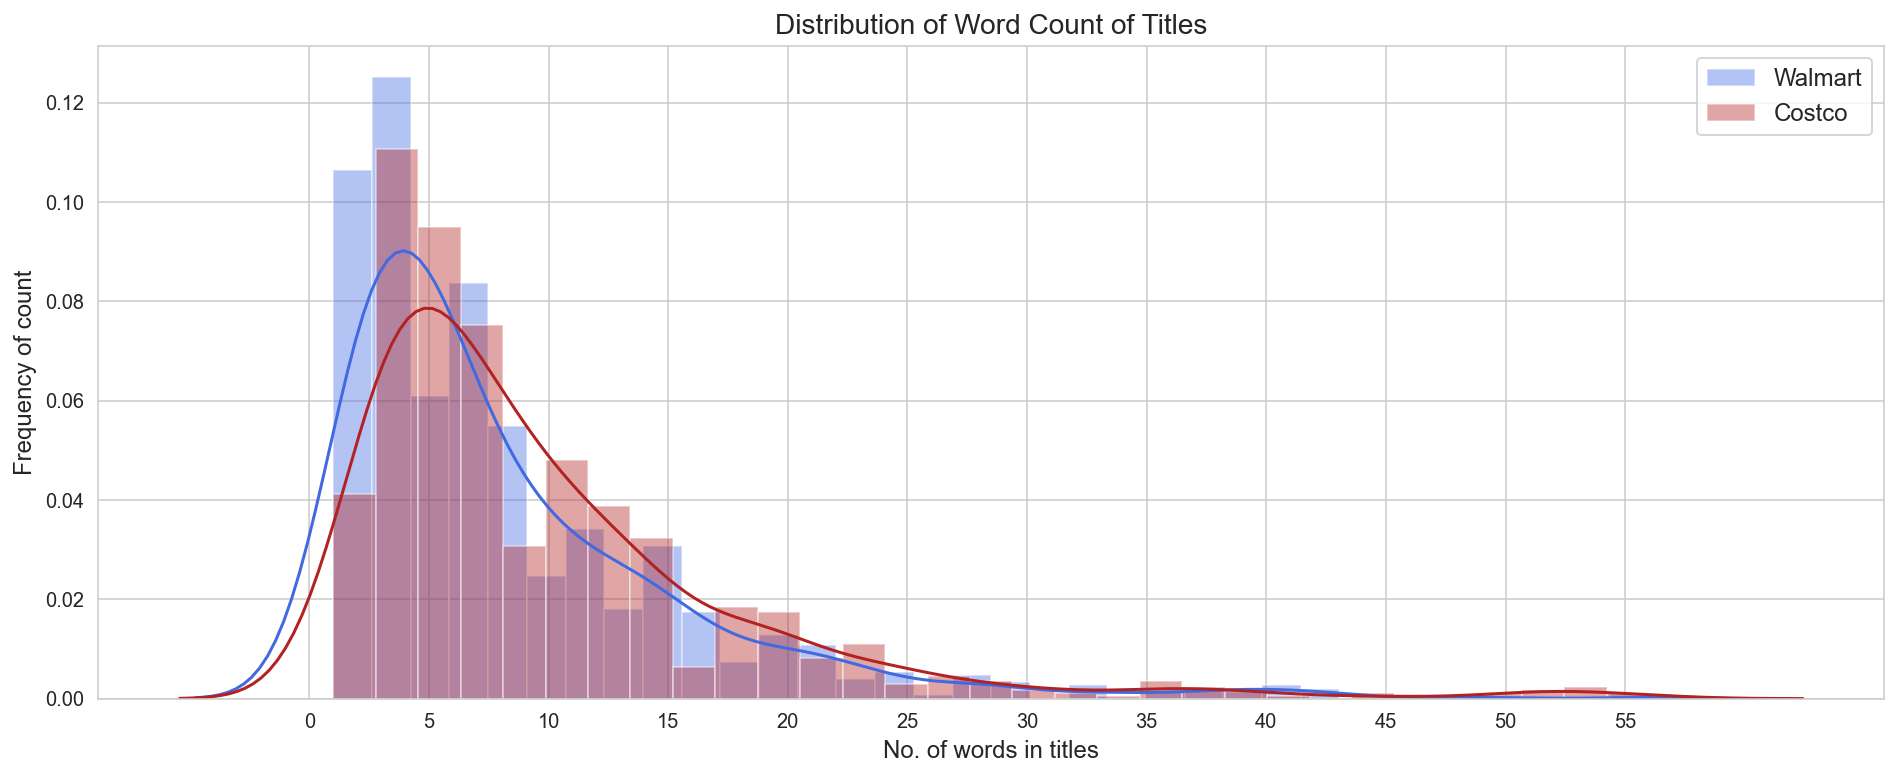

In [40]:
# view the distribution of word count for titles in Walmart and Costco using histogram 
plt.figure(figsize=(16, 6))
sns.distplot(walmart_df['title_word_count'], label='Walmart', color='royalblue')
sns.distplot(costco_df['title_word_count'], label='Costco', color='firebrick')
plt.title('Distribution of Word Count of Titles', fontsize=14)
plt.xlabel('No. of words in titles', fontsize=12)
plt.xticks(range(0, 60, 5))
plt.ylabel('Frequency of count', fontsize=12)
plt.legend(fontsize='large');

- Similarly, the distributions of word count of titles for Walmart and Costco are right-tailed, indicating that majority of the posts have word count smaller than 10.
- We do observe a large amount of word count of titles that are very similar between both subreddits, as indicated by the overlapping section in purple.
- Posts in Walmart seem to have more shorter titles than Costco, as seen from the boxplot where the median word count of titles in Walmart (6) is less than the median word count of titles in Costco (7).


- Both the distributions of character length of titles and word count of titles indicate that there may be some separability between the Walmart and Costco subreddits, and can potentially be beneficial features to be included in the modelling process.
- However for this project, the character length and word count of titles will not be included in the modelling.

<BarContainer object of 10 artists>

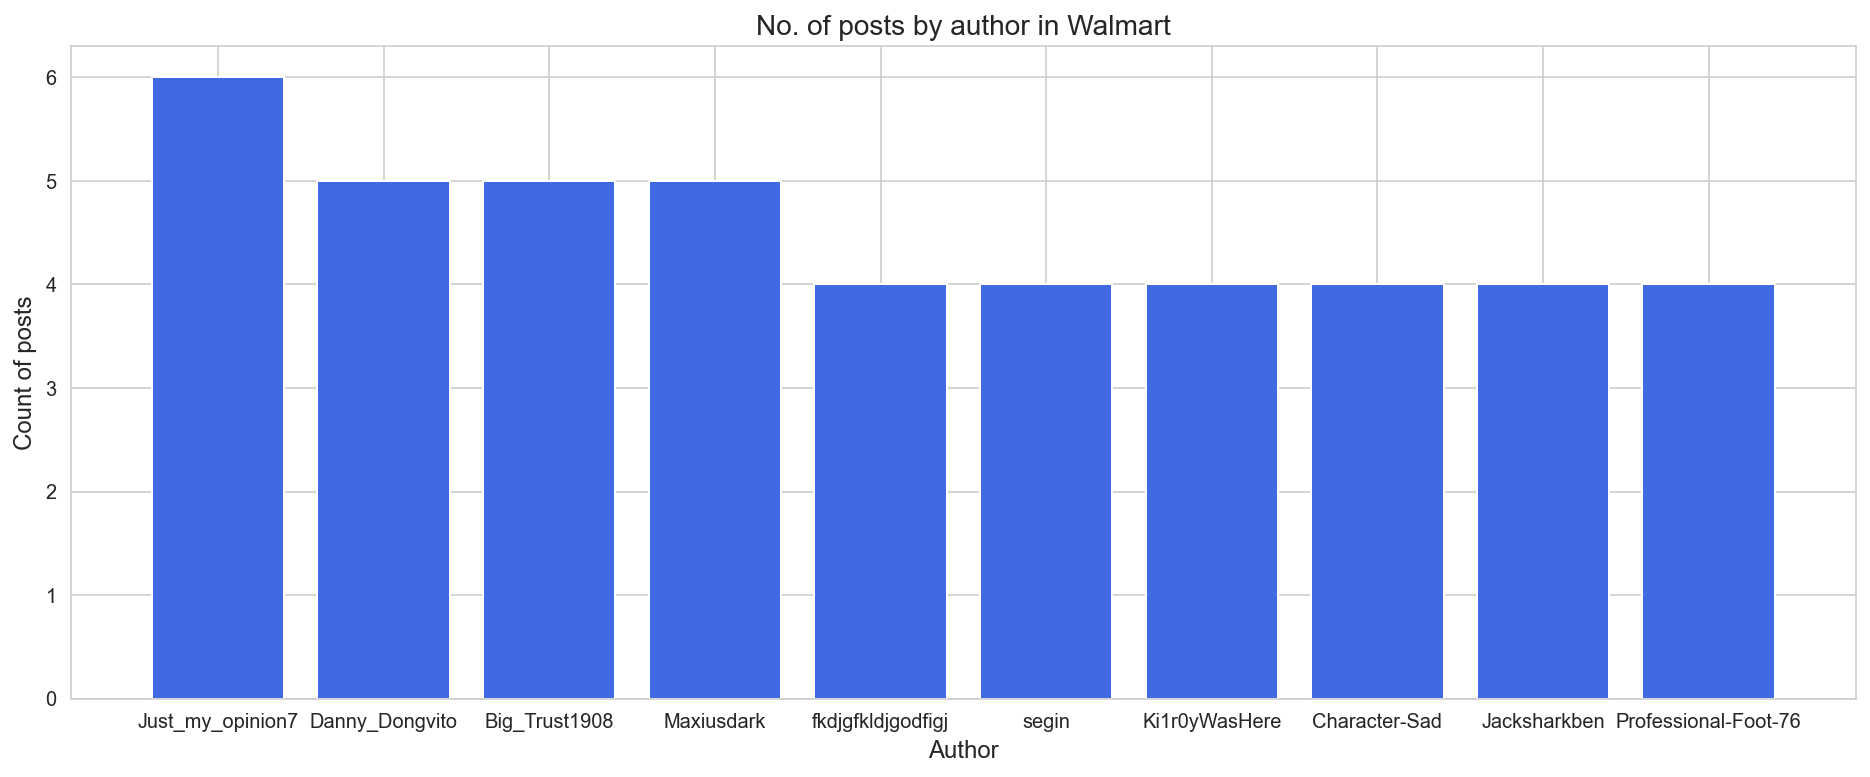

In [41]:
# view the top 10 authors for posts in Walmart

walmart_author = walmart_df['author'].value_counts(ascending=False).reset_index(name='Walmart Author')
walmart_author.columns = ['Walmart Author', 'Count']
walmart_author_top10 = walmart_author.head(10)
plt.figure(figsize=(16,6))
plt.xlabel('Author', fontsize=12)
plt.ylabel('Count of posts', fontsize=12)
plt.title('No. of posts by author in Walmart', fontsize=14)
plt.bar(walmart_author_top10['Walmart Author'], walmart_author_top10['Count'], color='royalblue')

<BarContainer object of 10 artists>

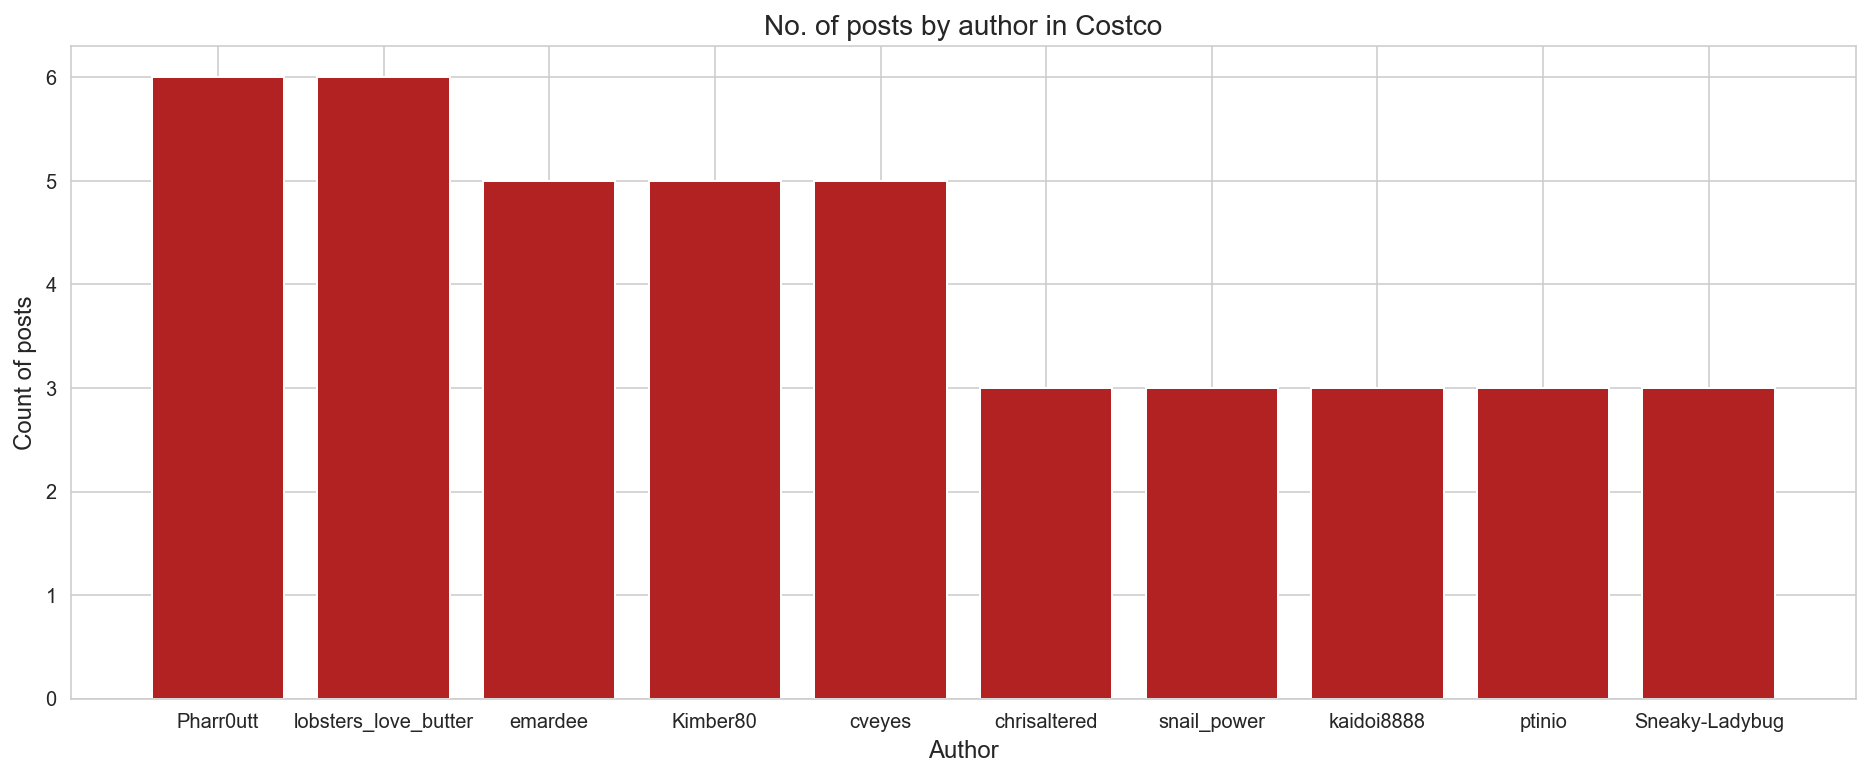

In [42]:
# view the top 10 authors for posts in Costco

costco_author = costco_df['author'].value_counts(ascending=False).reset_index(name='Costco Author')
costco_author.columns = ['Costco Author', 'Count']
costco_author_top10 = costco_author.head(10)
plt.figure(figsize=(16,6))
plt.xlabel('Author', fontsize=12)
plt.ylabel('Count of posts', fontsize=12)
plt.title('No. of posts by author in Costco', fontsize=14)
plt.bar(costco_author_top10['Costco Author'], costco_author_top10['Count'], color='firebrick')

- It is usually deduced that most posts in the respective subreddits are posted by the same group of users.
- While the feature 'author' will not be included in the modelling, it is interesting to observe from the above charts that the top 10 authors for posts in both Walmart and Costco do not overlap.  
- The highest number of posts per author in both subreddits are 6. 

### 6. Merging both Walmart and Costco datasets

From the above Exploratory Data Analysis and visualisations, we observe that the distributions of scores, number of comments, character length and word count of titles between both Walmart and Costco posts tend to be quite similar. Additionally, the top 50 words and two-word phrases in the titles for both Walmart and Costco not just represent feedback that customers may have of the brands, but also opinions from employees. 

In the [next notebook](./03_preprocessing_and_modelling.ipynb), we will examine the titles more closely, and understand how they will aid in the model performance. It is likely that we can build a classification model to distinguish posts between the two subreddits, and eventually identifying strategies to improve Walmart's brand image.

In [43]:
# merged both Walmart and Costco into one main DataFrame
combined_df = pd.concat([walmart_df, costco_df], axis=0)

In [44]:
# view the top 5 rows in the combined DataFrame
combined_df.head()

,author,created_utc,id,num_comments,score,selftext,subreddit,title,url,title_char_len,title_word_count
0,armoreddillo,2020-11-21 13:11:36,jy56so,434,4912,👆,walmart,"If you're here, as a customer, to complain abo...",https://www.reddit.com/r/walmart/comments/jy56...,87,14
1,jasiad,2021-06-08 23:53:14,nv7aao,28,18,"Disclaimer: Don't be disrespectful, don't be r...",walmart,Weekly Salt Thread 207 - The Nintendo Switch N...,https://www.reddit.com/r/walmart/comments/nv7a...,66,13
2,MadHatler,2021-06-10 06:33:11,nw89f8,47,481,nothinghere,walmart,How do y’all pay bills,https://i.redd.it/s12ll09dhb471.jpg,22,5
3,KVirello,2021-06-10 06:51:44,nw8n27,28,183,My entire adult life I have never worked Sunda...,walmart,Just promoted myself to customer halfway throu...,https://www.reddit.com/r/walmart/comments/nw8n...,98,16
4,-_Trashboat,2021-06-10 00:28:46,nvzzf2,48,454,nothinghere,walmart,DC Tips & Tricks #37: Make Sure Your Pallet Ha...,https://i.imgur.com/Lu5oNZ5.jpg,94,19


In [45]:
# export the combined DataFrame into a csv file
combined_df.to_csv('datasets/combined.csv')